# Setting

In [1]:
# Load dataset
#!pip3 install --upgrade oauth2client
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Please upload your csv on your google drive, give access to anyone, copy the link, and update the file ID and name.
google_docs = {
    '10EKrWLtL-Qqxyje4hyYtdj1eTVfihpoE' : 'clean_bank_Boost.csv',
    '13I9vgQ7InKF1-PfGXIIVBhSR0aaqjfOH' : 'clean_bank_train_Boost.csv',
    '1Bk9wFYStJPbXKtzi_DcawyzWF3Vo7rCq' : 'clean_bank_test_Boost.csv',
    '1j7HOEKLZctvRBl14vtglzYYzT-PIsiJd' : 'tutorial7.py',
    '1bQhKWLDYYW3NYGxYfY506B6lJ7Mk9G6Y' : 'tutorial2.py',
    '1ZhkHvU0bUYACMgnEnPDa61pdj1VC5F5y' : 'clean_store.csv',
    '1xXj4zNWaa9ETXKcIjORh18eRUpPWSWmq' : 'encoded_store.csv'

}


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

for key in google_docs:
  drive.CreateFile({'id':key}).GetContentFile(google_docs[key])

In [2]:
#!pip install cartopy
!pip install catboost
!pip install optuna
!pip install category_encoders
!pip install shap
!pip install dataprep
#!pip install xgboost
#!pip install lightgbm
!pip install pygam==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━

In [3]:
# Requirements 
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataprep
import sklearn
import xgboost as xgb
import lightgbm as lgb
import catboost
import optuna
import sys

from sklearn.model_selection import train_test_split

from tutorial7 import plot_feature_importance

print(f'Package versions: \n')

print(f'numpy {np.__version__}')
print(f'scipy {scipy.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
# print(f'cartopy {cartopy.__version__}')
print(f'scikit-learn {sklearn.__version__}')
print(f'xgboost {xgb.__version__}')
print(f'lightgbm {lgb.__version__}')
print(f'catboost {catboost.__version__}')
print(f'optuna {optuna.__version__}')

# Notebook tested on:

# numpy 1.23.5
# scipy 1.10.0
# pandas 1.5.2
# seaborn 0.12.2
# cartopy 0.21.1
# scikit-learn 1.2.0
# xgboost 1.6.1
# lightgbm 3.3.2
# catboost 1.0.6
# optuna 2.10.1



Package versions: 

numpy 1.22.4
scipy 1.10.1
pandas 1.5.3
seaborn 0.12.2
scikit-learn 1.2.2
xgboost 1.7.5
lightgbm 3.3.5
catboost 1.2
optuna 3.1.1


In [4]:
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['figure.dpi'] = 80
%config InlineBackend.figure_format = 'retina'


In [5]:
# Funtions

def plot_feature_importance(model, labels, max_features = 20):
    feature_importance = model.feature_importances_*100
    # feature_importance = model.feature_importance(importance_type='gain')
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Variable importance', fontsize=13)
    sns.despine()
    return fig, ax



def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('(True Negatives): ', cm[0][0])
    print('(False Positives): ', cm[0][1])
    print('(False Negatives): ', cm[1][0])
    print('(True Positives): ', cm[1][1])
    print('Total Actuall Subscribed: ', np.sum(cm[1]))

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by=['VIF'], ascending = [0]).round(5))

# Store

In [6]:
# Without encoding
store = pd.read_csv('encoded_store.csv')

store['clustype'] = store['clustype'].astype(object)
store = store.drop(['ltfreday'],axis=1)

index_train_v, index_test = train_test_split(store.index, train_size=0.7, random_state=7)


train_v = store.loc[index_train_v, :].copy()
test = store.loc[index_test, :].copy()

index_train, index_valid = train_test_split(train_v.index, train_size=0.8, random_state=7)

train = train_v.loc[index_train, :].copy()
valid = train_v.loc[index_valid, :].copy()


X_train = train.loc[:, train.columns!='resp'].copy()
X_valid = valid.loc[:, test.columns!='resp'].copy()
X_test = test.loc[:, test.columns!='resp'].copy()

predictors = list(X_train.columns)

y_train = train['resp']
y_valid = valid['resp']
y_test = test['resp']

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12173 entries, 19843 to 8916
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fre             12173 non-null  int64  
 1   mon             12173 non-null  float64
 2   cc_card         12173 non-null  int64  
 3   avrg            12173 non-null  float64
 4   ccspend         12173 non-null  float64
 5   gmp             12173 non-null  float64
 6   days            12173 non-null  int64  
 7   fredays         12173 non-null  float64
 8   markdown        12173 non-null  float64
 9   classes         12173 non-null  int64  
 10  coupons         12173 non-null  int64  
 11  styles          12173 non-null  int64  
 12  stores          12173 non-null  int64  
 13  web             12173 non-null  int64  
 14  mailed          12173 non-null  int64  
 15  responded       12173 non-null  int64  
 16  hi              12173 non-null  float64
 17  clustype        12173 non-nu

In [8]:
continuous = ['mon','avrg','ccspend','gmp',
              'fredays','markdown','hi',
              'days','fre','styles','classes']


nominal = ['clustype']

ordinal = ['coupons','stores','mailed','responded']

binary = ['cc_card', 'web', 'valphon_y', 'psweaters_0', 'pknit_tops_0',
          'pknit_dres_0', 'pblouses_0', 'pjackets_0', 'pcar_pnts_0',
          'pcas_pnts_0', 'pshirts_0', 'pdresses_0', 'psuits_0', 'pouterwear_0',
          'pjewelry_0', 'pfashion_0', 'plegwear_0', 'pcollspnd_0', 'amspend_0',
          'psspend_0', 'axspend_0', 'tmonspend_0', 'omonspend_0', 'smonspend_0',
          'prevpd_0', 'gmp_0', 'markdown_0', 'responserate_0', 'percret_0',
          'pc_calc20_11']

# Since the model is logistic regression, we only try a subset of predictors to avoid multicolinearity
variables = ['cc_card', 'web', 'valphon_y','pc_calc20_11'] + nominal + ordinal

# Multicolinearity

In [9]:
continuous = ['mon','avrg','ccspend','gmp',
              'fredays','markdown','hi',
              'days','fre','styles','classes']


nominal = ['clustype']

ordinal = ['coupons','stores','mailed','responded']

binary = ['cc_card', 'web', 'valphon_y', 'pc_calc20_11',
          'psweaters_0', 'pknit_tops_0',
          'pknit_dres_0', 'pblouses_0', 'pjackets_0', 'pcar_pnts_0',
          'pcas_pnts_0', 'pshirts_0', 'pdresses_0', 'psuits_0', 'pouterwear_0',
          'pjewelry_0', 'pfashion_0', 'plegwear_0', 'pcollspnd_0', 'amspend_0',
          'psspend_0', 'axspend_0', 'tmonspend_0', 'omonspend_0', 'smonspend_0',
          'prevpd_0', 'gmp_0', 'markdown_0', 'responserate_0', 'percret_0',
          ]

# Since the model is logistic regression, we only try a subset of predictors to avoid multicolinearity
features = ['cc_card', 'web', 'valphon_y','pc_calc20_11'] + ordinal


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = train[continuous+binary+ordinal]
vif['avg_sale_per_item'] = vif['mon']/vif['styles']
vif = vif.drop([
                'gmp'
                # 'classes','styles','amspend_0','days',
                #'pouterwear_0','hi','axspend_0','mon','psuits_0','omonspend_0'
                ],axis=1)
calc_vif(vif)

,variables,VIF
8,styles,26.46451
9,classes,25.86513
29,amspend_0,20.92434
0,mon,20.03423
6,days,18.72705
24,pouterwear_0,14.14121
7,fre,11.57381
31,axspend_0,10.10729
44,avg_sale_per_item,9.45545
41,stores,9.11770


In [ ]:
train['avg_sale_per_item'] = train['mon']/train['styles']
valid['avg_sale_per_item'] = valid['mon']/valid['styles']
test['avg_sale_per_item'] = test['mon']/test['styles']

In [ ]:
mul = ['gmp','classes','styles','amspend_0','days',
       'pouterwear_0','hi','axspend_0','mon','psuits_0','omonspend_0']

continuous = ['mon','avrg','ccspend','gmp',
              'fredays','markdown','hi',
              'days','fre','styles','classes','avg_sale_per_item']


nominal = ['clustype']

ordinal = ['coupons','stores','mailed','responded']

binary = ['cc_card', 'web', 'valphon_y', 'pc_calc20_11',
          'psweaters_0', 'pknit_tops_0',
          'pknit_dres_0', 'pblouses_0', 'pjackets_0', 'pcar_pnts_0',
          'pcas_pnts_0', 'pshirts_0', 'pdresses_0', 'psuits_0', 'pouterwear_0',
          'pjewelry_0', 'pfashion_0', 'plegwear_0', 'pcollspnd_0', 'amspend_0',
          'psspend_0', 'axspend_0', 'tmonspend_0', 'omonspend_0', 'smonspend_0',
          'prevpd_0', 'gmp_0', 'markdown_0', 'responserate_0', 'percret_0',
          ]

for x in mul:
  if x in continuous:
    continuous.remove(x)
  elif x in binary:
    binary.remove(x)
continuous,binary

(['avrg', 'ccspend', 'fredays', 'markdown', 'fre', 'avg_sale_per_item'],
 ['cc_card',
  'web',
  'valphon_y',
  'pc_calc20_11',
  'psweaters_0',
  'pknit_tops_0',
  'pknit_dres_0',
  'pblouses_0',
  'pjackets_0',
  'pcar_pnts_0',
  'pcas_pnts_0',
  'pshirts_0',
  'pdresses_0',
  'pjewelry_0',
  'pfashion_0',
  'plegwear_0',
  'pcollspnd_0',
  'psspend_0',
  'tmonspend_0',
  'smonspend_0',
  'prevpd_0',
  'gmp_0',
  'markdown_0',
  'responserate_0',
  'percret_0'])

# Feature engineering

## Nominal encoding

In [ ]:
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.glmm import GLMMEncoder
from category_encoders.cat_boost import CatBoostEncoder

In [ ]:
# We dont encode the discrete values because decision trees take a range anyways so we dont have to.

nominal = ['clustype']

for x in nominal:
    # Target encoder
    encoder = TargetEncoder().fit(train[x], y_train) # we must use the training set for this
    train[x+'TE'] = encoder.transform(train[x])
    valid[x+'TE'] = encoder.transform(valid[x])
    test[x+'TE'] = encoder.transform(test[x])


    # Leave one out encoder
    encoder = LeaveOneOutEncoder().fit(train[x], y_train) 
    train[x+'LeaveOneOut'] = encoder.transform(train[x])
    valid[x+'LeaveOneOut'] = encoder.transform(valid[x])
    test[x+'LeaveOneOut'] = encoder.transform(test[x])

    # GLMM encoder
    encoder =  GLMMEncoder().fit(train[x], y_train)
    train[x+'GLMM'] = encoder.transform(train[x])
    valid[x+'GLMM'] = encoder.transform(valid[x])
    test[x+'GLMM'] = encoder.transform(test[x])

    # CatBoostEncoder
    encoder = CatBoostEncoder().fit(train[x], y_train) 
    train[x+'CatBoost'] = encoder.transform(train[x])
    valid[x+'CatBoost'] = encoder.transform(valid[x])
    test[x+'CatBoost'] = encoder.transform(test[x])
    
    # One-hot encoder
    dummies = pd.get_dummies(store[x],  prefix = x)
    train = train.join(dummies.loc[index_train, :])
    valid = valid.join(dummies.loc[index_valid, :])
    test = test.join(dummies.loc[index_test, :])
    globals()['%s_OneHot' % x] = list(dummies.columns)

## Continuous encdoing

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

yj = PowerTransformer(method='yeo-johnson')
bc = PowerTransformer(method='box-cox')
mmscaler = MinMaxScaler()
sscaler = StandardScaler()


continuous = ['avrg',
              'ccspend',
              'fredays',
              'markdown',
              'fre',
              'avg_sale_per_item']

for x in continuous:

    if train[x].min() > 0:
        # Log
        train[x+'Log'] = np.log(train[x])
        valid[x+'Log'] = np.log(valid[x])
        test[x+'Log'] = np.log(test[x])

        # Box-Cox transformation
        train[x+'BC']  = bc.fit_transform(train[[x]])
        valid[x+'BC'] = bc.transform(valid[[x]])
        test[x+'BC'] = bc.transform(test[[x]])


    # Yeo-Johnson transformation
    train[x+'YJ']  = yj.fit_transform(train[[x]])
    valid[x+'YJ'] = yj.transform(valid[[x]])
    test[x+'YJ'] = yj.transform(test[[x]])
 


    #Normalize the predictor x using min-max normalization - MinMaxScaler - between 0-1
    column_2d = np.array(train[x]).reshape(-1, 1)
    train[x+'MinMax'] = mmscaler.fit_transform(column_2d)
    valid[x+'MinMax'] = mmscaler.transform(valid[[x]])
    test[x+'MinMax'] = mmscaler.transform(test[[x]])



    # Standardization
    column_2d = np.array(train[x]).reshape(-1, 1)
    train[x+'SD'] = sscaler.fit_transform(column_2d)
    valid[x+'SD'] = sscaler.transform(valid[[x]])
    test[x+'SD'] = sscaler.transform(test[[x]])    


## Functions

In [ ]:
# Auxiliary code - important to understand but similar to previous tutorials
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss, recall_score, f1_score

def test_encodings(algo, nominal=[], variables=[]):

  nominal = ['clustype']

  results_df_dic = {}
  for x in nominal:

      rows = ['One-Hot encoding', 'Target encoder', 'Leave-one-out encoder', 
              'GLMM encoder', 'CatBoost encoder', 'Ordinal encoder']

      columns=['F1-score','AUC','Sensitivity', 'Precision', 
                'Specificity', 'Error Rate','Cross-entropy','Loss']

      results = pd.DataFrame(0.0, columns=columns, index=rows)
    

      y_prob = np.zeros((len(y_valid), len(rows)))
      for i in range(len(rows)):
        if i == 5 and x != 'clustype':
          continue
        feature = []
        if i==0:
            feature = variables + globals()['%s_OneHot' % x]
        elif i==1: 
            feature = variables + [x+'TE'] 
        elif i==2:
            feature = variables + [x+'LeaveOneOut']
        elif i==3: 
            feature = variables + [x+'GLMM']
        elif i==4: 
            feature = variables + [x+'CatBoost']  
        if x == 'clustype':
          if i==5:
            feature = variables + ['clustype']
        
        X_train = train[feature]
        X_valid = valid[feature]

        if 'clustype' in feature:
            X_train['clustype'] = X_train['clustype'].astype(int)
            X_valid['clustype'] = X_valid['clustype'].astype(int)
    
        model = algo
        model.fit(X_train, y_train)

        # validation set predictions
        
        tau = 1/20
        y_prob[:, i] = model.predict_proba(X_valid)[:, 1]
        y_pred = (y_prob[:,i] > tau).astype(int)

        loss =  19*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))


        tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()

        results.iloc[i,0] =  f1_score(y_valid, y_pred)  #f1-score
        results.iloc[i,1] =  roc_auc_score(y_valid, y_prob[:, i])   # AUC
        results.iloc[i,2] =  tp/(tp+fn)   # Sensitivity
        results.iloc[i,3] =  precision_score(y_valid, y_pred)   # Precision
        results.iloc[i,4] =  tn/(tn+fp)   # Specificity
        results.iloc[i,5] =   1 - accuracy_score(y_valid, y_pred)   # Error rate
        results.iloc[i,6] =  log_loss(y_valid, y_prob[:, i])   # Cross entropy
        results.iloc[i,7] =  np.mean(loss) # or (fp*1+fn*5)/len(y_test)
        


      if x not in results_df_dic:
          results_df_dic[x] = results
  return results_df_dic

In [ ]:
# Auxiliary code - important to understand but similar to previous tutorials
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss, recall_score, f1_score

continuous = ['avrg', 'ccspend', 'fredays',
              'markdown', 'fre',
              'avg_sale_per_item']

y_valid = np.ravel(y_valid)
def test_transformations(algo, continuous=[], variables=[]):

    continuous = ['avrg', 'ccspend', 'fredays',
                  'markdown', 'fre',
                  'avg_sale_per_item']

    results_df_dic = {}
    for x in continuous:

        rows = ['No transformation', 'Log transformation', 'Yeo-Johnson transformation', 
                'Box-cox transformation',
                'Normalization', 'Standarization']

        columns=['F1-score','AUC','Sensitivity', 'Precision', 
                'Specificity', 'Error Rate','Cross-entropy','Loss']

        results = pd.DataFrame(0.0, columns=columns, index=rows)
      
        
        y_prob = np.zeros((len(y_valid), len(rows)))
        for i in range(len(rows)):

            if (i == 1 or i==3) and train[x].min()<=0:
                continue
            feature = []
            if i==0:
                feature = variables + [x]  # No transformation
            elif i==1: 
                feature = variables + [x+'Log'] # Log
            elif i==2:
                feature = variables + [x+'YJ']  # Yeo-Johnson transformation
            elif i==3: 
                 feature = variables + [x+'BC']  # Box-cox transformation
            elif i==4: 
                feature = variables + [x+'MinMax']  # Normalization
            else: 
                feature = variables + [x+'SD']  # Standardization

          
            X_train = train[feature]
            X_valid = valid[feature]
            model = algo
            model.fit(X_train, y_train)

            # validation set predictions
            
            # y_prob[:, i] = model.predict_proba(X_valid)[:, 1]
            tau = 1/20
            y_prob[:, i] = model.predict_proba(X_valid)[:, 1]
            y_pred = (y_prob[:,i] > tau).astype(int)


            tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
            loss =  19*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

            results.iloc[i,0] =  f1_score(y_valid, y_pred)  #f1-score
            results.iloc[i,1] =  roc_auc_score(y_valid, y_prob[:, i])   # AUC
            results.iloc[i,2] =  tp/(tp+fn)   # Sensitivity
            results.iloc[i,3] =  precision_score(y_valid, y_pred)   # Precision
            results.iloc[i,4] =  tn/(tn+fp)   # Specificity
            results.iloc[i,5] =   1 - accuracy_score(y_valid, y_pred)   # Error rate
            results.iloc[i,6] =  log_loss(y_valid, y_prob[:, i])   # Cross entropy
            results.iloc[i,7] =  np.mean(loss) # or (fp*1+fn*5)/len(y_test)


        if x not in results_df_dic:
            results_df_dic[x] = results
    return results_df_dic

# Best encoders for Logistic

In [ ]:
continuous = ['avrg', 'ccspend', 'fredays',
              'markdown',  'fre',
              'avg_sale_per_item']

nominal = ['clustype']

ordinal = ['coupons','stores','mailed','responded']

binary = ['cc_card', 'web', 'valphon_y', 'pc_calc20_11', 'psweaters_0',
          'pknit_tops_0', 'pknit_dres_0', 'pblouses_0', 'pjackets_0',
          'pcar_pnts_0', 'pcas_pnts_0', 'pshirts_0', 'pdresses_0',
          'pjewelry_0', 'pfashion_0', 'plegwear_0', 'pcollspnd_0',
          'psspend_0', 'tmonspend_0', 'smonspend_0', 'prevpd_0',
          'gmp_0', 'markdown_0', 'responserate_0', 'percret_0']

# Since the model is logistic regression, we only try a subset of predictors to avoid multicolinearity
variables = ['cc_card', 'web', 'valphon_y','pc_calc20_11'] + ordinal

In [ ]:
features = ['cc_card', 'web', 'valphon_y','pc_calc20_11'] + ordinal

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV()


continuous = ['avrg', 'ccspend', 'fredays',
              'markdown', 'fre',
              'avg_sale_per_item']
results_transformations =test_transformations(logit, continuous, features)

In [ ]:
for key in results_transformations:
    print(key)
    display(results_transformations[key].sort_values(by=['F1-score','AUC'], ascending = [0,0]).round(5))
    # display(results_transformations[key].sort_values(by=['AUC','F1-score'], ascending = [0,0]).round(5))

avrg


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Box-cox transformation,0.30166,0.78591,0.99425,0.17780,0.04837,0.78942,0.38406,0.80716
Yeo-Johnson transformation,0.30157,0.78591,0.99425,0.17774,0.04798,0.78975,0.38405,0.80749
Log transformation,0.30087,0.78579,0.99425,0.17725,0.04481,0.79238,0.38409,0.81012
No transformation,0.30009,0.78550,0.99425,0.17671,0.04124,0.79534,0.38460,0.81307
Standarization,0.30009,0.78547,0.99425,0.17671,0.04124,0.79534,0.38461,0.81307
Normalization,0.29769,0.78205,1.00000,0.17487,0.02339,0.80913,0.38605,0.80913


ccspend


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Box-cox transformation,0.30679,0.78338,1.0,0.18119,0.06463,0.77497,0.38302,0.77497
Yeo-Johnson transformation,0.30670,0.78339,1.0,0.18112,0.06423,0.77530,0.38305,0.77530
Log transformation,0.30598,0.78365,1.0,0.18062,0.06106,0.77792,0.38326,0.77792
Normalization,0.30500,0.78126,1.0,0.17994,0.05670,0.78154,0.38340,0.78154
Standarization,0.30314,0.78191,1.0,0.17864,0.04837,0.78844,0.38358,0.78844
No transformation,0.30270,0.78189,1.0,0.17834,0.04639,0.79008,0.38359,0.79008


fredays


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Box-cox transformation,0.33702,0.79228,0.96360,0.20422,0.22284,0.65013,0.37397,0.76248
Yeo-Johnson transformation,0.33669,0.79225,0.96169,0.20407,0.22363,0.64980,0.37397,0.76807
Log transformation,0.33567,0.79282,0.96360,0.20323,0.21808,0.65407,0.37363,0.76643
Standarization,0.32644,0.78887,0.96743,0.19635,0.18041,0.68463,0.37919,0.78515
No transformation,0.32624,0.78875,0.96935,0.19612,0.17764,0.68660,0.37943,0.78121
Normalization,0.32591,0.78894,0.96743,0.19596,0.17843,0.68627,0.37924,0.78679


markdown


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Log transformation,0.30464,0.78035,1.0,0.17969,0.05511,0.78285,0.38605,0.78285
Normalization,0.30455,0.78020,1.0,0.17963,0.05472,0.78318,0.38603,0.78318
No transformation,0.30455,0.78020,1.0,0.17963,0.05472,0.78318,0.38603,0.78318
Yeo-Johnson transformation,0.30446,0.78017,1.0,0.17957,0.05432,0.78351,0.38605,0.78351
Box-cox transformation,0.30446,0.78015,1.0,0.17957,0.05432,0.78351,0.38605,0.78351
Standarization,0.30384,0.78026,1.0,0.17914,0.05155,0.78581,0.38607,0.78581


fre


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Yeo-Johnson transformation,0.36911,0.80277,0.95211,0.22893,0.33624,0.55815,0.36744,0.70598
Log transformation,0.36819,0.80327,0.95785,0.22789,0.32831,0.56373,0.36581,0.69382
Box-cox transformation,0.36645,0.80287,0.95402,0.22678,0.32672,0.56570,0.36695,0.70762
Normalization,0.30352,0.79783,0.99808,0.17898,0.05234,0.78548,0.37301,0.79139
Standarization,0.30335,0.79789,0.99808,0.17885,0.05155,0.78614,0.37300,0.79205
No transformation,0.29277,0.79007,1.00000,0.17148,0.00000,0.82852,0.38318,0.82852


avg_sale_per_item


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
No transformation,0.30696,0.78462,0.98851,0.18169,0.07851,0.76544,0.38373,0.80092
Standarization,0.30632,0.78470,0.98851,0.18124,0.07573,0.76774,0.38375,0.80322
Box-cox transformation,0.30542,0.78413,0.99234,0.18049,0.06741,0.77398,0.38400,0.79763
Yeo-Johnson transformation,0.30524,0.78408,0.99234,0.18036,0.06661,0.77464,0.38401,0.79829
Log transformation,0.30453,0.78420,0.99234,0.17986,0.06344,0.77727,0.38408,0.80092
Normalization,0.29931,0.78254,1.00000,0.17599,0.03093,0.80289,0.38572,0.80289


## Best Continuous Encoders
1. AUC
- avrg: YJ
- ccspend: Log
- fredays: Log
- markdown: Log
- fre: Log
- avg_sale_per_item: No

2. F1
- avrg: BC
- ccspend: BC
- fredays: BC
- markdown: Log
- fre: YJ
- avg_sale_per_item: No

In [ ]:
# AUC
logit_con = ['avrgYJ', 'ccspendLog','fredaysLog',
             'markdownLog',
             'freLog','avg_sale_per_item']

# F1
# logit_con = ['avrgBC', 'ccspendBC','fredaysBC',
#              'markdownLog', 
#              'freYJ', 'avg_sale_per_item']

In [ ]:
nominal = ['clustype']
results_encodings = test_encodings(logit,nominal, features)

In [ ]:
for key in results_encodings:
    print(key)
    display(results_encodings[key].sort_values(by=['F1-score','AUC'], ascending = [0,0]).round(5))
    display(results_encodings[key].sort_values(by=['AUC','F1-score'], ascending = [0,0]).round(5))

clustype


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
CatBoost encoder,0.30414,0.77770,0.99808,0.17941,0.05511,0.78318,0.38697,0.78909
Leave-one-out encoder,0.30414,0.77736,0.99808,0.17941,0.05511,0.78318,0.38718,0.78909
Target encoder,0.30352,0.77802,0.99808,0.17898,0.05234,0.78548,0.38676,0.79139
GLMM encoder,0.30270,0.77959,1.00000,0.17834,0.04639,0.79008,0.38641,0.79008
One-Hot encoding,0.29905,0.77992,1.00000,0.17582,0.02974,0.80388,0.38640,0.80388
Ordinal encoder,0.29752,0.78123,1.00000,0.17476,0.02260,0.80979,0.38629,0.80979


,F1-score,AUC,Sensitivity,Precision,Specificity,Error Rate,Cross-entropy,Loss
Ordinal encoder,0.29752,0.78123,1.00000,0.17476,0.02260,0.80979,0.38629,0.80979
One-Hot encoding,0.29905,0.77992,1.00000,0.17582,0.02974,0.80388,0.38640,0.80388
GLMM encoder,0.30270,0.77959,1.00000,0.17834,0.04639,0.79008,0.38641,0.79008
Target encoder,0.30352,0.77802,0.99808,0.17898,0.05234,0.78548,0.38676,0.79139
CatBoost encoder,0.30414,0.77770,0.99808,0.17941,0.05511,0.78318,0.38697,0.78909
Leave-one-out encoder,0.30414,0.77736,0.99808,0.17941,0.05511,0.78318,0.38718,0.78909


## Best Nominal encoder
1. AUC
- Clustype: Ordinal
2. F1
- clustype： CatBoost


In [ ]:
logit_cat = ['clustype'] # AUC
train['clustype'] = train['clustype'].astype(int)
valid['clustype'] = valid['clustype'].astype(int)
test['clustype'] = test['clustype'].astype(int)
# logit_cat = ['clustypeCatBoost'] # F1


# Transformed variables

In [ ]:
from dataprep.eda import plot

plot(train[continuous])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from dataprep.eda import plot

plot(train[logit_con])

Output hidden; open in https://colab.research.google.com to view.

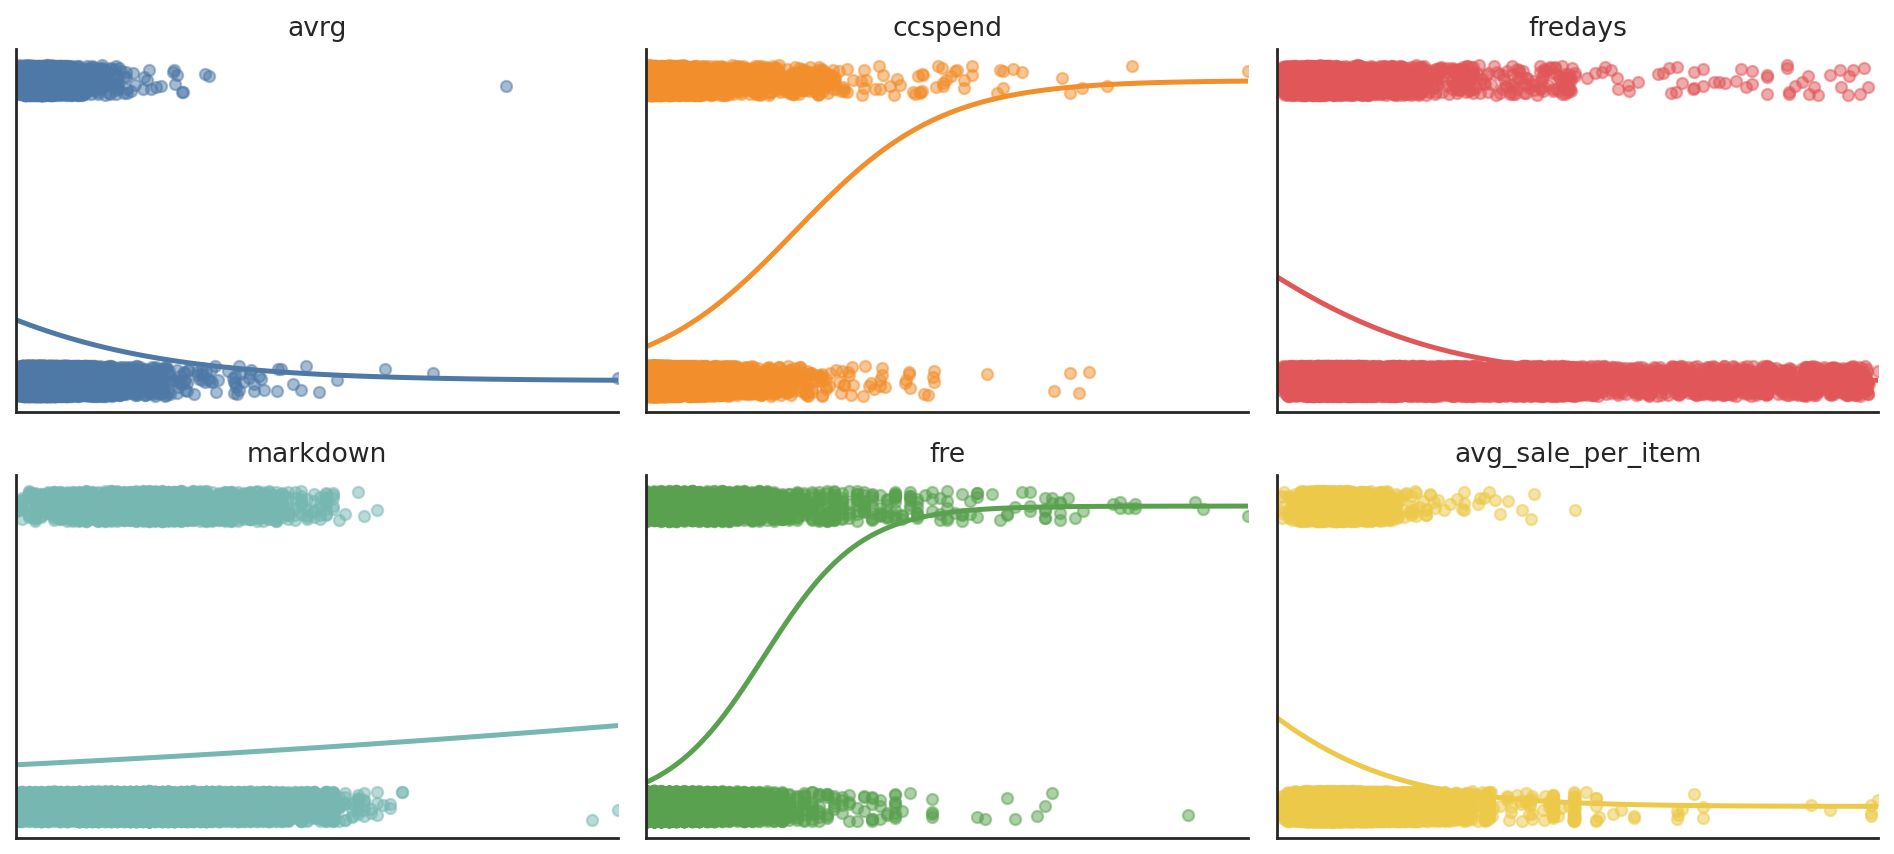

In [ ]:
from tutorial2 import regplots
fig, ax = regplots(train[continuous], train['resp'])
plt.show()

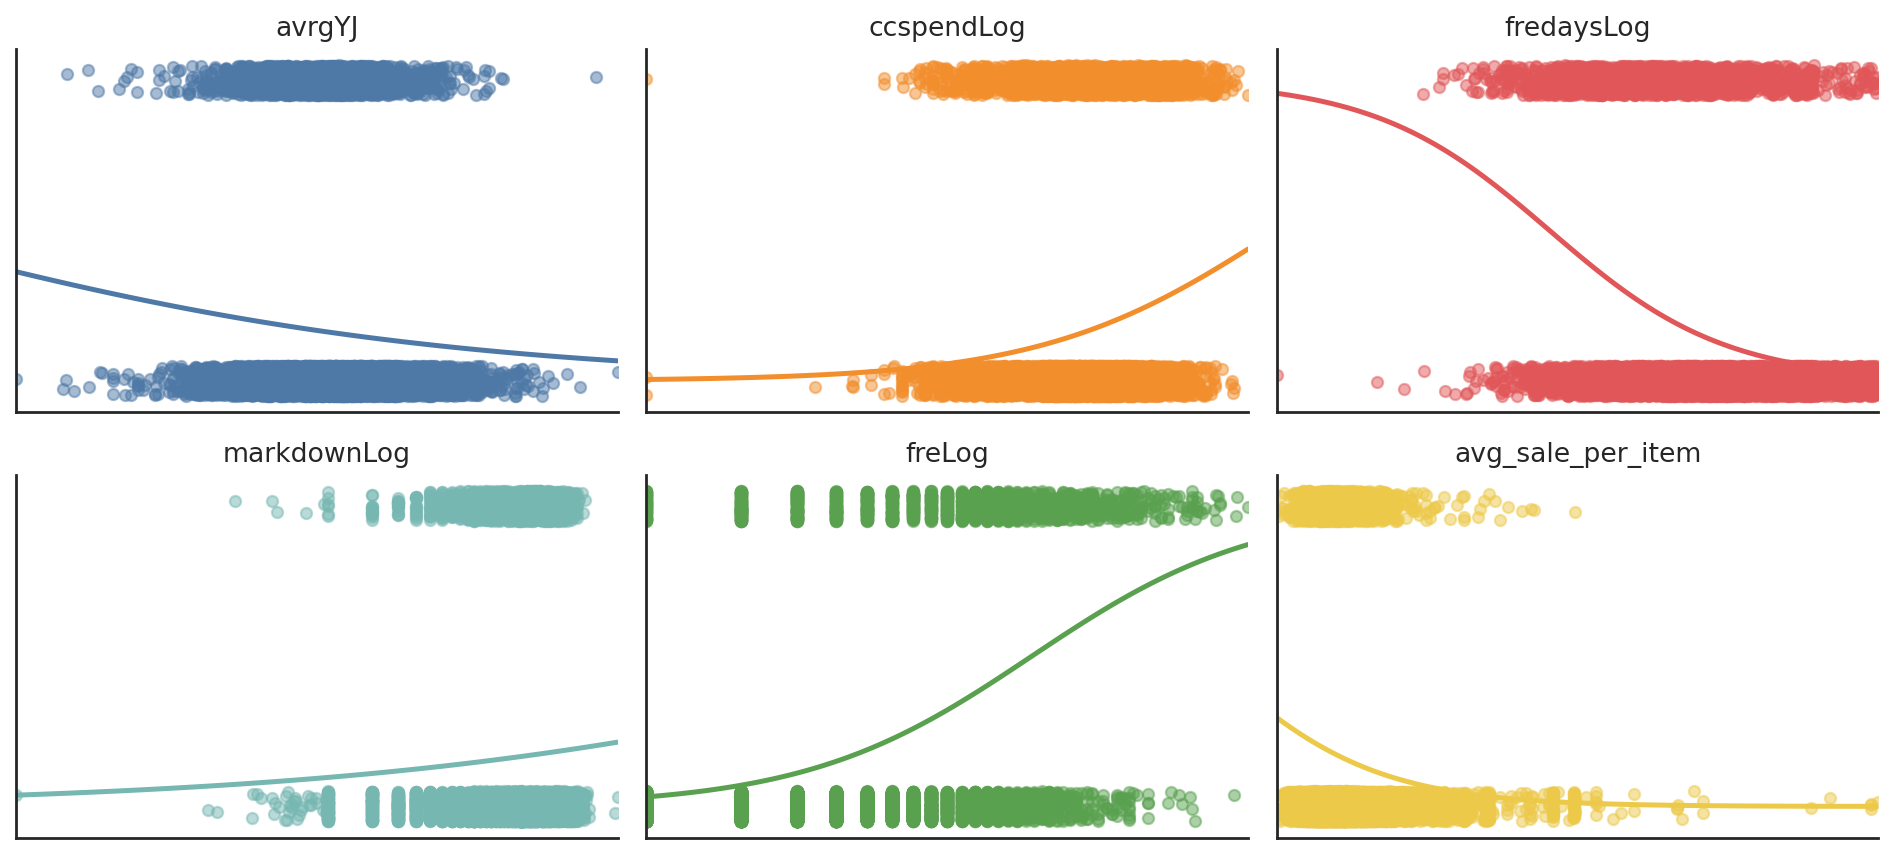

In [ ]:
from tutorial2 import regplots
fig, ax = regplots(train[logit_con], train['resp'])
plt.show()

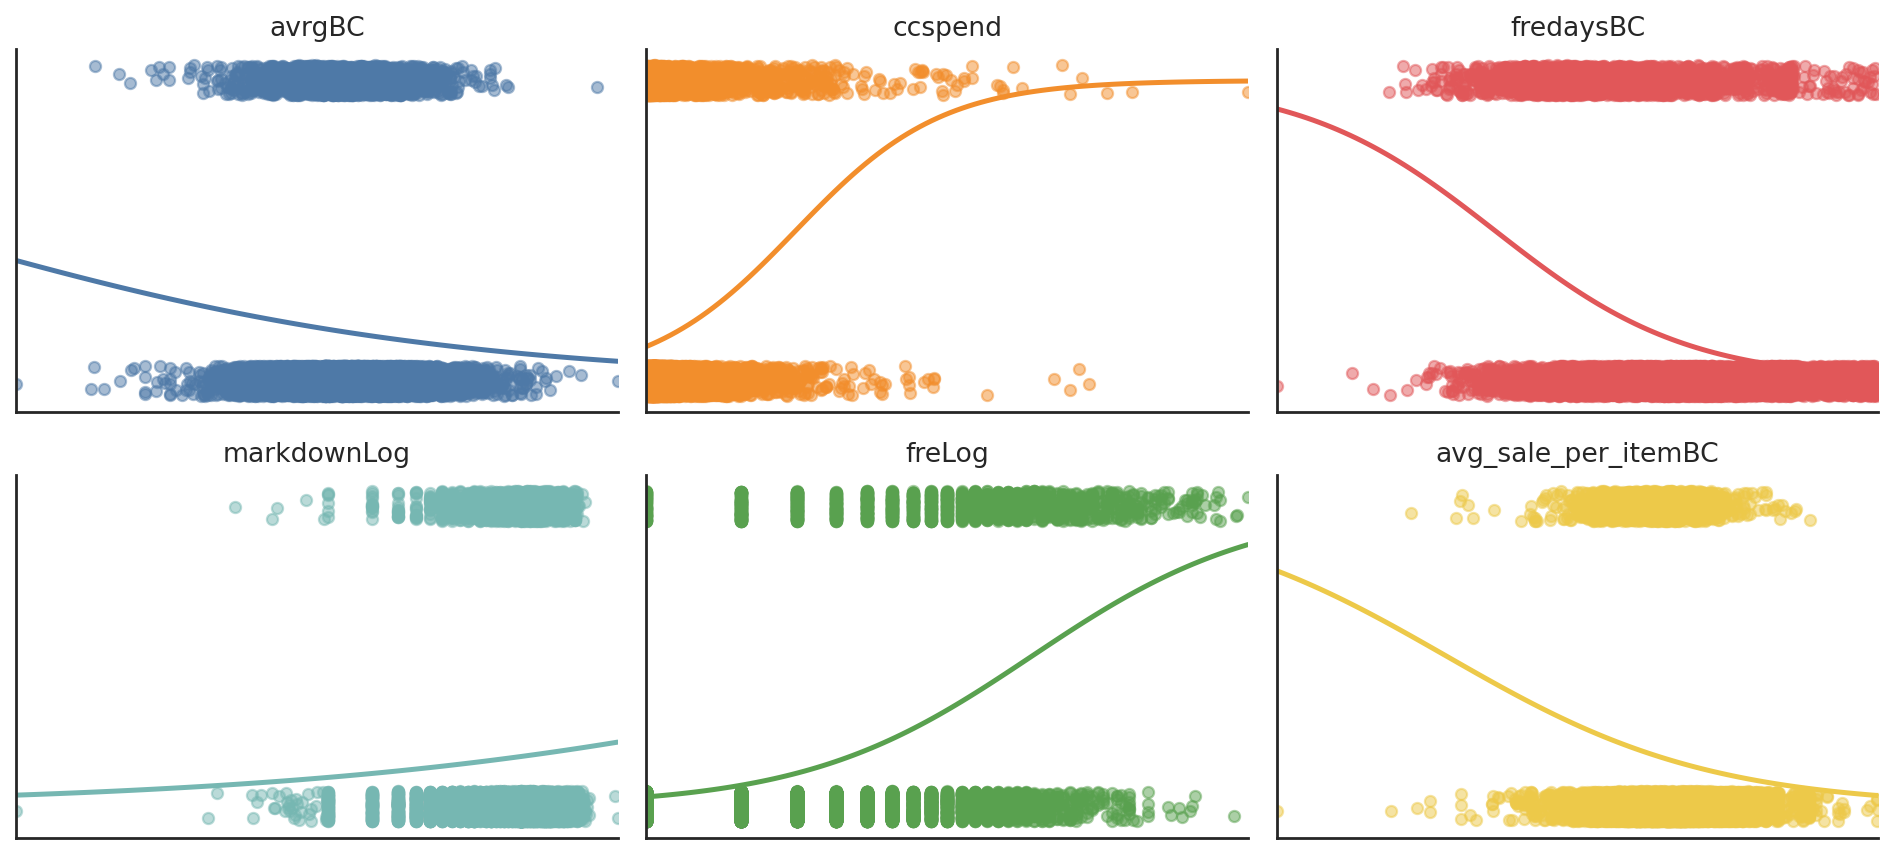

In [ ]:
from tutorial2 import regplots
# F1
logit_con_f = ['avrgBC', 'ccspend','fredaysBC',
             'markdownLog',
             'freLog', 'avg_sale_per_itemBC']

fig, ax = regplots(train[logit_con_f], train['resp'])
plt.show()

## Linearity

In [ ]:
# AUC
logit_con = ['avrgYJ', 'ccspend','fredaysLog',
             'markdownLog',
             'freLog','avg_sale_per_itemBC']

# F1
# logit_con_f = ['avrgBC', 'ccspend','fredaysBC',
            #  'markdownLog',  
            #  'freLog', 'avg_sale_per_itemBC']

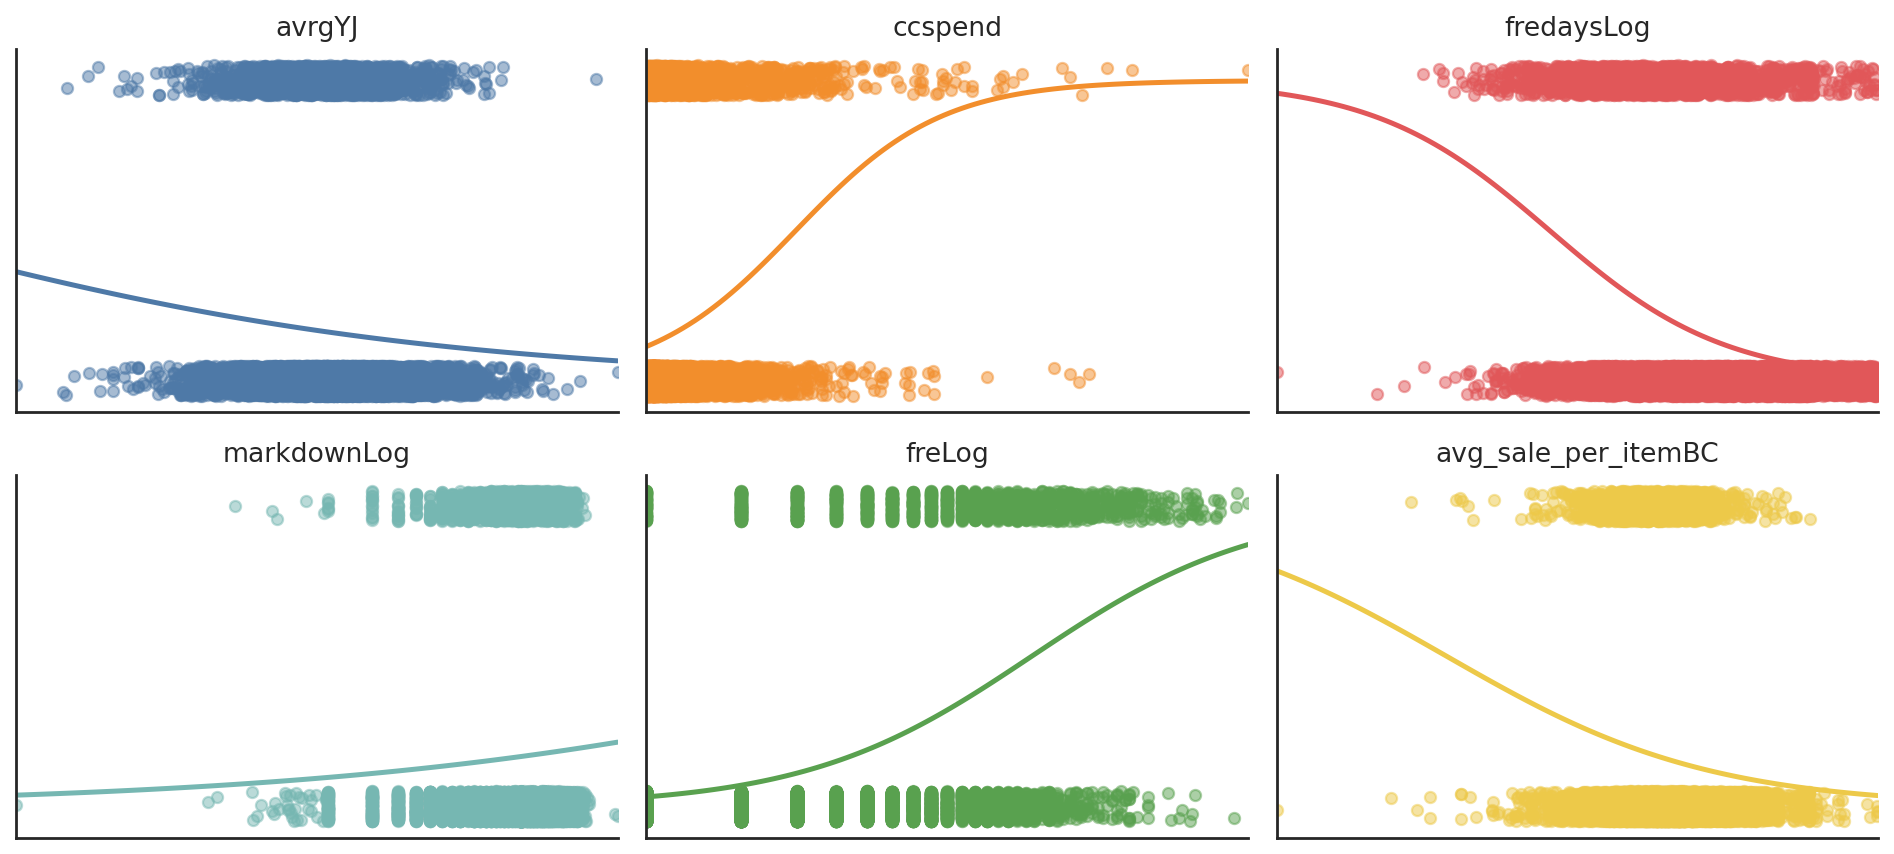

In [ ]:
from tutorial2 import regplots
fig, ax = regplots(train[logit_con], train['resp'])
plt.show()

# Logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# AUC
logit_con = ['avrgYJ', 'ccspend','fredaysLog',
             'markdownLog',
             'freLog','avg_sale_per_itemBC']
logit_cat = ['clustype'] 


# # F1
# logit_con_f = ['avrgBC', 'ccspend','fredaysBC',
#              'markdownLog',  
#              'freLog', 'avg_sale_per_itemBC']

# logit_cat = ['clustypeCatBoost'] 


logit_predictors = binary + ordinal + logit_cat + logit_con

logit_X_train = train[logit_predictors]
logit_X_valid = valid[logit_predictors]
logit_X_test = test[logit_predictors]


# Standardization

scaler = StandardScaler()
logit_X_train_s = scaler.fit_transform(logit_X_train)
logit_X_valid_s = scaler.transform(logit_X_valid)
logit_X_test_s = scaler.transform(logit_X_test)  



# Normalization
scaler = MinMaxScaler()
logit_X_train_n = scaler.fit_transform(logit_X_train)
logit_X_valid_n = scaler.transform(logit_X_valid)
logit_X_test_n = scaler.transform(logit_X_test)  


y_train = train['resp']
y_valid = valid['resp']
y_test = test['resp']

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegressionCV()
logit.fit(logit_X_train, y_train)

LogisticRegressionCV()

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_s = LogisticRegressionCV()
logit_s.fit(logit_X_train_s, y_train)

LogisticRegressionCV()

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_n = LogisticRegressionCV()
logit_n.fit(logit_X_train_n, y_train)

LogisticRegressionCV()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, log_loss,f1_score

columns=['Loss', 'SE', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross-entropy',
         'F1-score', 'Error Rate']
rows=['Logistic','Logistic - Standarized','Logistic - Normalized']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logit,logit_s,logit_n]

y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):    
    
    if i == 0:
        y_prob[:,i] = method.predict_proba(logit_X_valid)[:,1]
    elif i == 1:
        y_prob[:,i] = method.predict_proba(logit_X_valid_s)[:,1]
    elif i == 2:
        y_prob[:,i] = method.predict_proba(logit_X_valid_n)[:,1]

    tau = 1/20       
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  19*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 


    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*9)/len(y_test)
    results.iloc[i,1] =  np.std(loss)/np.sqrt(len(y_valid))
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  precision_score(y_valid, y_pred)
    results.iloc[i,5] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,6] =  log_loss(y_valid, y_prob[:,i])
    results.iloc[i,7] =  f1_score(y_valid, y_pred)  #f1-score
    results.iloc[i,8] =   1 - accuracy_score(y_valid, y_pred) # error rate



results.sort_values(by=['AUC','F1-score'], ascending = [0,0]).round(5)

,Loss,SE,Sensitivity,Specificity,Precision,AUC,Cross-entropy,F1-score,Error Rate
Logistic,0.71715,0.03261,0.94828,0.33783,0.22864,0.80318,0.36619,0.36844,0.55749
Logistic - Standarized,0.70532,0.03263,0.94828,0.35210,0.23250,0.80300,0.36631,0.37344,0.54566
Logistic - Normalized,0.70466,0.03263,0.94828,0.35289,0.23272,0.80300,0.36631,0.37373,0.54501


(True Negatives):  2469
(False Positives):  53
(False Negatives):  417
(True Positives):  105
Total Actuall Subscribed:  522
(True Negatives):  5310
(False Positives):  108
(False Negatives):  881
(True Positives):  224
Total Actuall Subscribed:  1105
(True Negatives):  1766
(False Positives):  3652
(False Negatives):  68
(True Positives):  1037
Total Actuall Subscribed:  1105


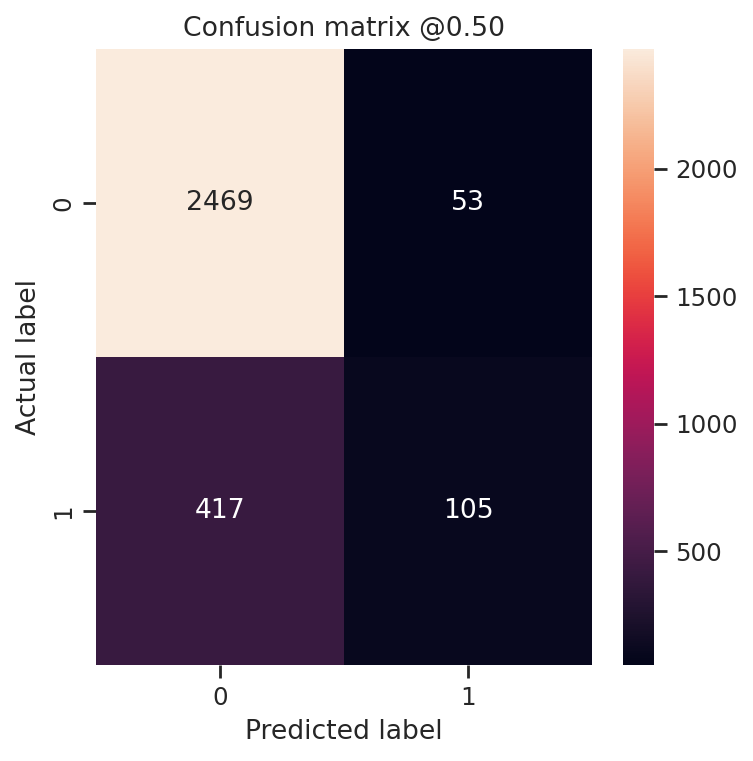

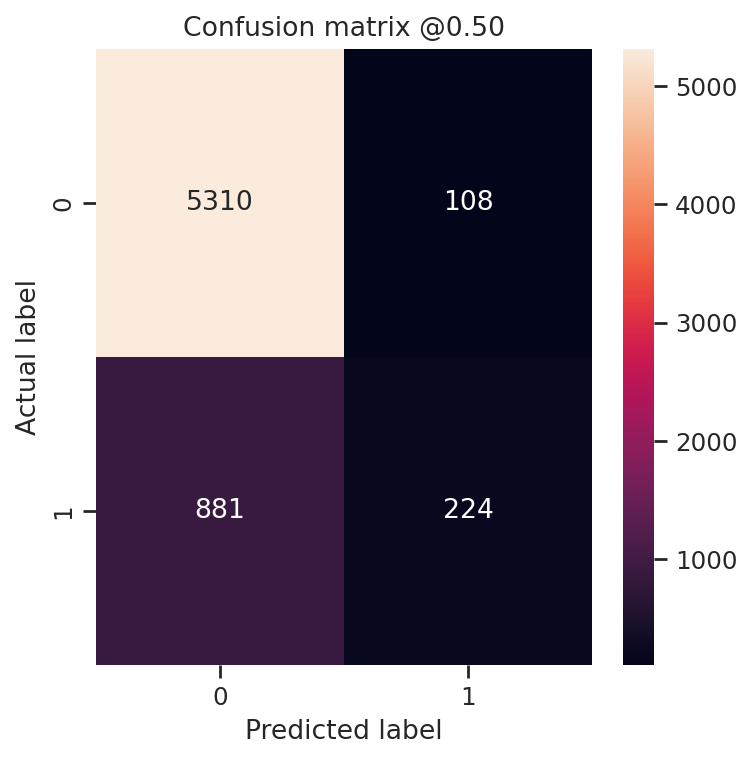

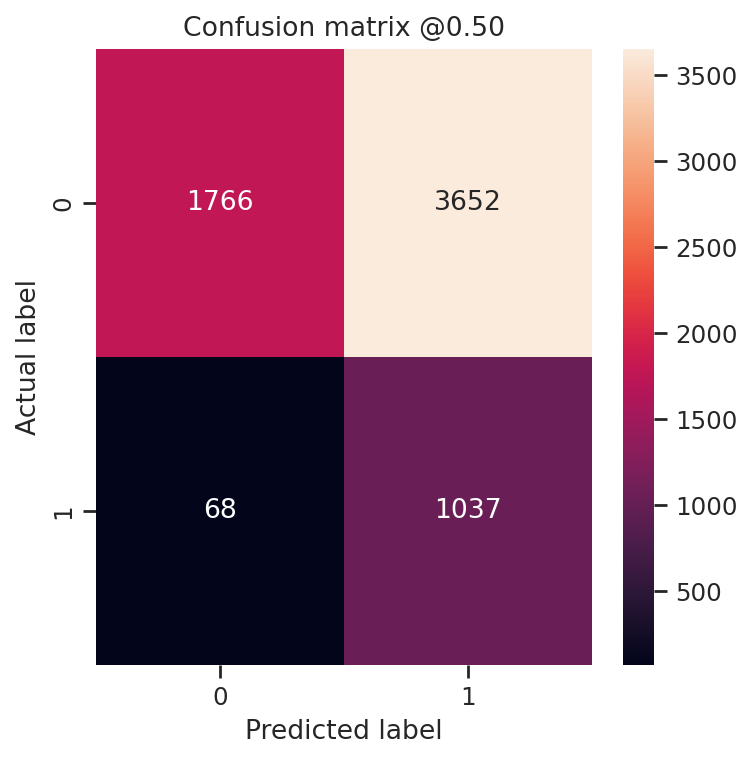

In [ ]:
# Non standarised
tau = 1/20

method = logit


y_prob = method.predict_proba(logit_X_valid)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(logit_X_test)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(logit_X_test)[:,1]
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)

(True Negatives):  2469
(False Positives):  53
(False Negatives):  417
(True Positives):  105
Total Actuall Subscribed:  522
(True Negatives):  5307
(False Positives):  111
(False Negatives):  885
(True Positives):  220
Total Actuall Subscribed:  1105
(True Negatives):  1815
(False Positives):  3603
(False Negatives):  71
(True Positives):  1034
Total Actuall Subscribed:  1105


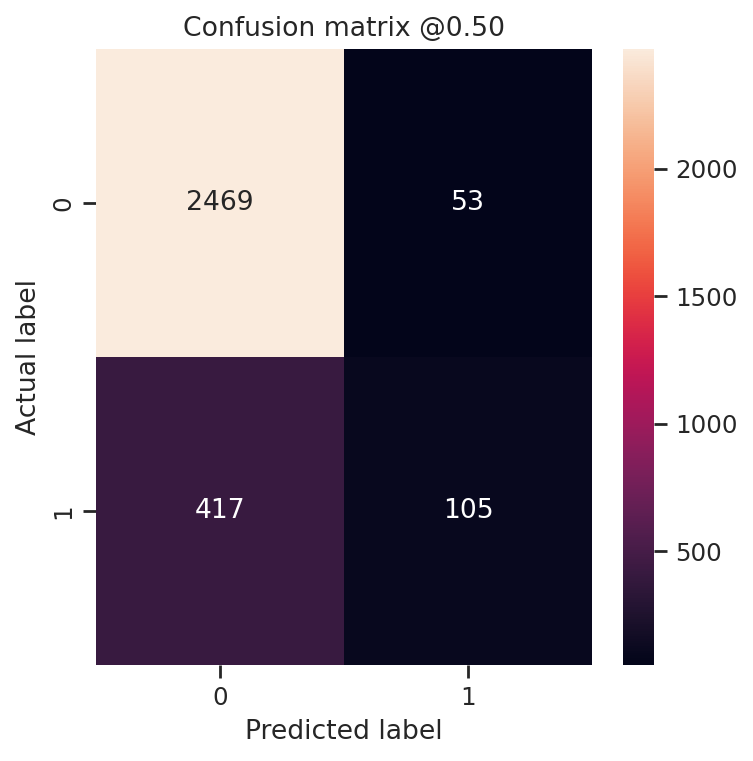

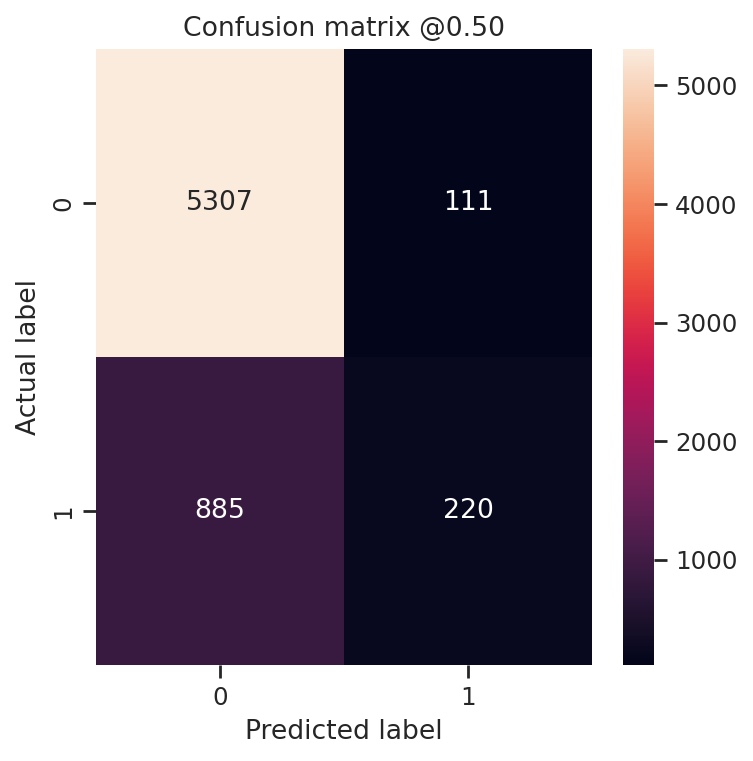

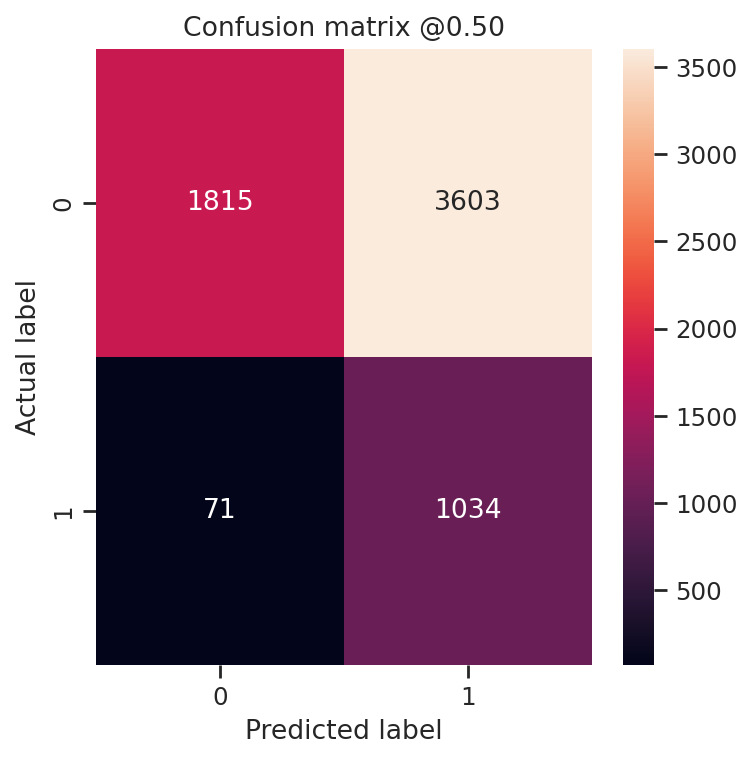

In [ ]:
# Standarised

tau = 1/20

method = logit_s


y_prob = method.predict_proba(logit_X_valid_s)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(logit_X_test_s)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(logit_X_test_s)[:,1]
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)

In [ ]:
print(y_prob.shape)
print(logit_X_test_s.shape)
print(y_test.shape)

(6523,)
(6523, 36)
(6523,)


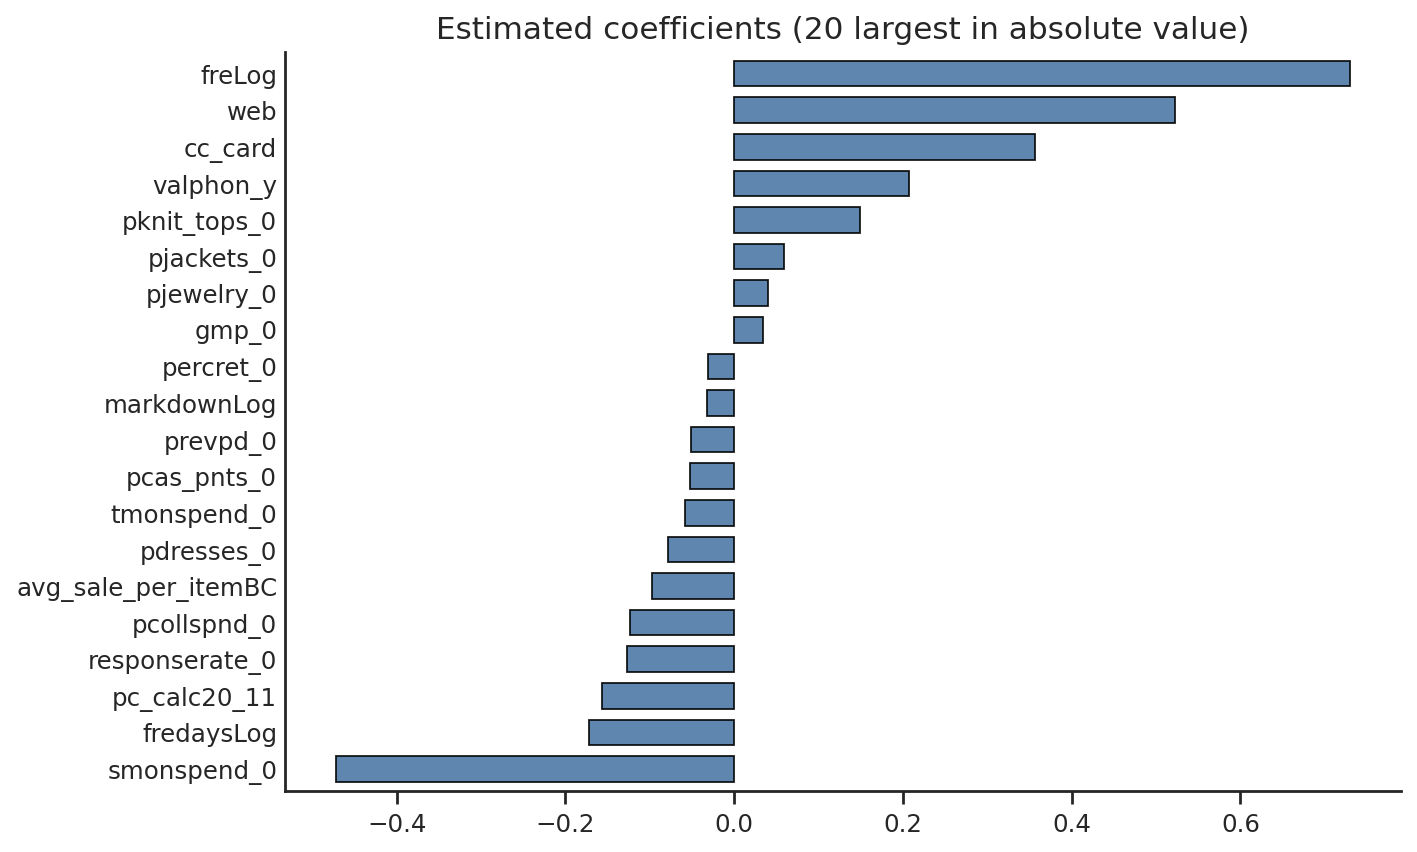

In [ ]:
# Coeffients
from tutorial2 import coefplot

coefplot(logit, logit_predictors)
plt.show()

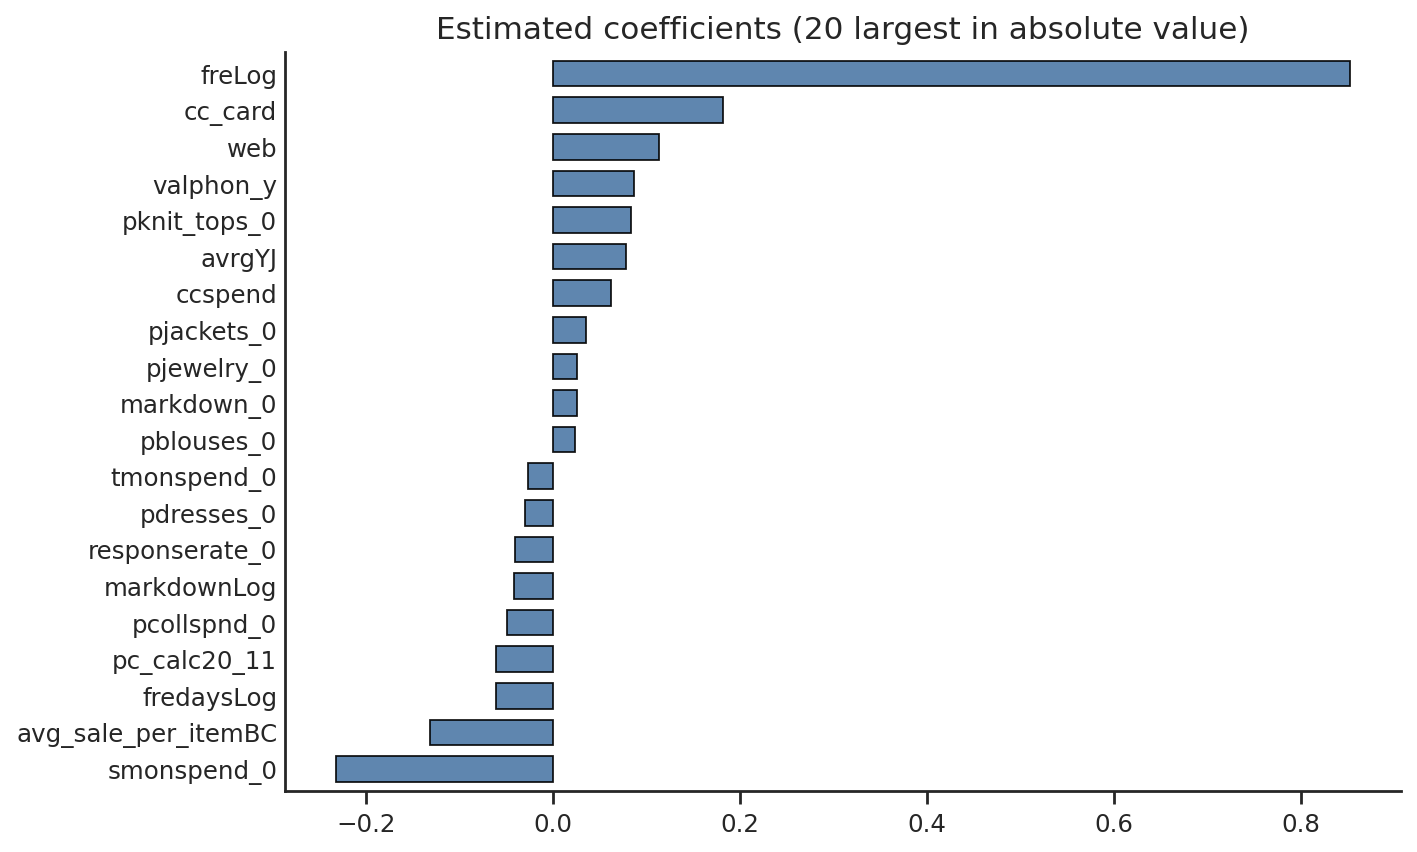

In [ ]:
from tutorial2 import coefplot
coefplot(logit_s, logit_predictors)
plt.show()

## Training

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Select the penalties by cross-validation
logit_l1= LogisticRegressionCV(Cs = 50, penalty='l1', solver='liblinear', scoring='neg_log_loss')
logit_l1.fit(logit_X_train_s, y_train)

logit_l2= LogisticRegressionCV(Cs = 50, penalty='l2', scoring='neg_log_loss')
logit_l2.fit(logit_X_train_s, y_train)

LogisticRegressionCV(Cs=50, scoring='neg_log_loss')

In [ ]:
logit_l2_f1= LogisticRegressionCV(Cs = 50, penalty='l2', scoring='f1')
logit_l2_f1.fit(logit_X_train_s, y_train)


logit_l2_auc= LogisticRegressionCV(Cs = 50, penalty='l2', scoring='roc_auc')
logit_l2_auc.fit(logit_X_train_s, y_train)

LogisticRegressionCV(Cs=50, scoring='roc_auc')

In [ ]:
logit_l1_f1= LogisticRegressionCV(Cs = 50,  penalty='l1',solver='liblinear', scoring='f1')
logit_l1_f1.fit(logit_X_train_s, y_train)

logit_l1_auc= LogisticRegressionCV(Cs = 50,  penalty='l1',solver='liblinear', scoring='f1')
logit_l1_auc.fit(logit_X_train_s, y_train)

LogisticRegressionCV(Cs=50, penalty='l1', scoring='f1', solver='liblinear')

In [ ]:
logit_f1_nt= LogisticRegressionCV(Cs = 50, solver='newton-cg', scoring='f1')
logit_f1_nt.fit(logit_X_train, y_train)

logit_nt= LogisticRegressionCV(Cs = 50, solver='newton-cg', scoring='neg_log_loss')
logit_nt.fit(logit_X_train, y_train)

logit_l2_f1_nt= LogisticRegressionCV(Cs = 50, penalty='l2',solver='newton-cg', scoring='f1')
logit_l2_f1_nt.fit(logit_X_train_s, y_train)

LogisticRegressionCV(Cs=50, scoring='f1', solver='newton-cg')

In [ ]:
logit_f1_sg= LogisticRegressionCV(Cs = 50, solver='sag', scoring='f1')
logit_f1_sg.fit(logit_X_train, y_train)

logit_l1_f1_sg= LogisticRegressionCV(Cs = 50, penalty='l1',solver='saga', scoring='f1')
logit_l1_f1_sg.fit(logit_X_train_s, y_train)

LogisticRegressionCV(Cs=50, penalty='l1', scoring='f1', solver='saga')

## Validation results

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score
from sklearn.metrics import precision_score, log_loss,f1_score

columns=['Loss', 'SE', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross-entropy',
         'F1-score','Error Rate']
rows=['Logistic', 'Logistic - Normalized', 'Logistic - Standarized',
      'Logistic L1', 'Logistic L2', 'Logistic L2 - F1', 'Logistic L2 - AUC',
      'Logistic Newton - F1', 'Logistic Newton', 'Logistic Newton L2 - F1',
      'Logistic SAG - F1', 'Logistic SAGA L1 - F1',
      'Logistic L1 - F1', 'Logistic L1 - AUC'
      ]
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logit, logit_n, logit_s, 
         logit_l1, logit_l2, logit_l2_f1, logit_l2_auc,
         logit_f1_nt, logit_nt, logit_l2_f1_nt,
         logit_f1_sg, logit_l1_f1_sg,
         logit_l1_f1, logit_l1_auc
         ]

y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):    
    
    if (i == 0 or i == 7 or i == 8 or i== 10):
        y_prob[:,i] = method.predict_proba(logit_X_valid)[:,1]
    elif i == 1:
        y_prob[:,i] = method.predict_proba(logit_X_valid_n)[:,1]
    else:
        y_prob[:,i] = method.predict_proba(logit_X_valid_s)[:,1]

    tau = 1/20       
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  19*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 

    
    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*9)/len(y_test)
    results.iloc[i,1] =  np.std(loss)/np.sqrt(len(y_valid))
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  precision_score(y_valid, y_pred)
    results.iloc[i,5] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,6] =  log_loss(y_valid, y_prob[:,i])
    results.iloc[i,7] =  f1_score(y_valid, y_pred)  #f1-score
    results.iloc[i,8] =   1 - accuracy_score(y_valid, y_pred) # error rate


results.sort_values(by=['Loss','F1-score'], ascending = [1,0]).round(5)

,Loss,SE,Sensitivity,Specificity,Precision,AUC,Cross-entropy,F1-score,Error Rate
Logistic L1,0.69777,0.03090,0.95402,0.33862,0.22992,0.80332,0.36578,0.37054,0.55585
Logistic Newton,0.69908,0.03149,0.95211,0.34457,0.23116,0.80344,0.36617,0.37201,0.55125
Logistic - Normalized,0.70466,0.03263,0.94828,0.35289,0.23272,0.80300,0.36631,0.37373,0.54501
Logistic Newton - F1,0.70466,0.03263,0.94828,0.35289,0.23272,0.80296,0.36631,0.37373,0.54501
Logistic SAGA L1 - F1,0.70466,0.03263,0.94828,0.35289,0.23272,0.80296,0.36631,0.37373,0.54501
Logistic - Standarized,0.70532,0.03263,0.94828,0.35210,0.23250,0.80300,0.36631,0.37344,0.54566
Logistic L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36631,0.37316,0.54632
Logistic Newton L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36630,0.37316,0.54632
Logistic L1 - F1,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829
Logistic L1 - AUC,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829


In [ ]:
results.sort_values(by=['AUC','F1-score'], ascending = [0,0]).round(5)

,Loss,SE,Sensitivity,Specificity,Precision,AUC,Cross-entropy,F1-score,Error Rate
Logistic Newton,0.69908,0.03149,0.95211,0.34457,0.23116,0.80344,0.36617,0.37201,0.55125
Logistic L1,0.69777,0.03090,0.95402,0.33862,0.22992,0.80332,0.36578,0.37054,0.55585
Logistic L2,0.72142,0.03371,0.94444,0.34774,0.23059,0.80320,0.36633,0.37068,0.54993
Logistic,0.71715,0.03261,0.94828,0.33783,0.22864,0.80318,0.36619,0.36844,0.55749
Logistic L1 - F1,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829
Logistic L1 - AUC,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829
Logistic L2 - AUC,0.71978,0.03371,0.94444,0.34972,0.23113,0.80311,0.36631,0.37137,0.54829
Logistic L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36631,0.37316,0.54632
Logistic Newton L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36630,0.37316,0.54632
Logistic - Standarized,0.70532,0.03263,0.94828,0.35210,0.23250,0.80300,0.36631,0.37344,0.54566


In [ ]:
results.sort_values(by=['F1-score','AUC'], ascending = [0,0]).round(5)

,Loss,SE,Sensitivity,Specificity,Precision,AUC,Cross-entropy,F1-score,Error Rate
Logistic - Normalized,0.70466,0.03263,0.94828,0.35289,0.23272,0.80300,0.36631,0.37373,0.54501
Logistic SAGA L1 - F1,0.70466,0.03263,0.94828,0.35289,0.23272,0.80296,0.36631,0.37373,0.54501
Logistic Newton - F1,0.70466,0.03263,0.94828,0.35289,0.23272,0.80296,0.36631,0.37373,0.54501
Logistic - Standarized,0.70532,0.03263,0.94828,0.35210,0.23250,0.80300,0.36631,0.37344,0.54566
Logistic L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36631,0.37316,0.54632
Logistic Newton L2 - F1,0.70598,0.03263,0.94828,0.35131,0.23229,0.80302,0.36630,0.37316,0.54632
Logistic L1 - F1,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829
Logistic L1 - AUC,0.70795,0.03263,0.94828,0.34893,0.23163,0.80316,0.36611,0.37232,0.54829
Logistic Newton,0.69908,0.03149,0.95211,0.34457,0.23116,0.80344,0.36617,0.37201,0.55125
Logistic L2 - AUC,0.71978,0.03371,0.94444,0.34972,0.23113,0.80311,0.36631,0.37137,0.54829


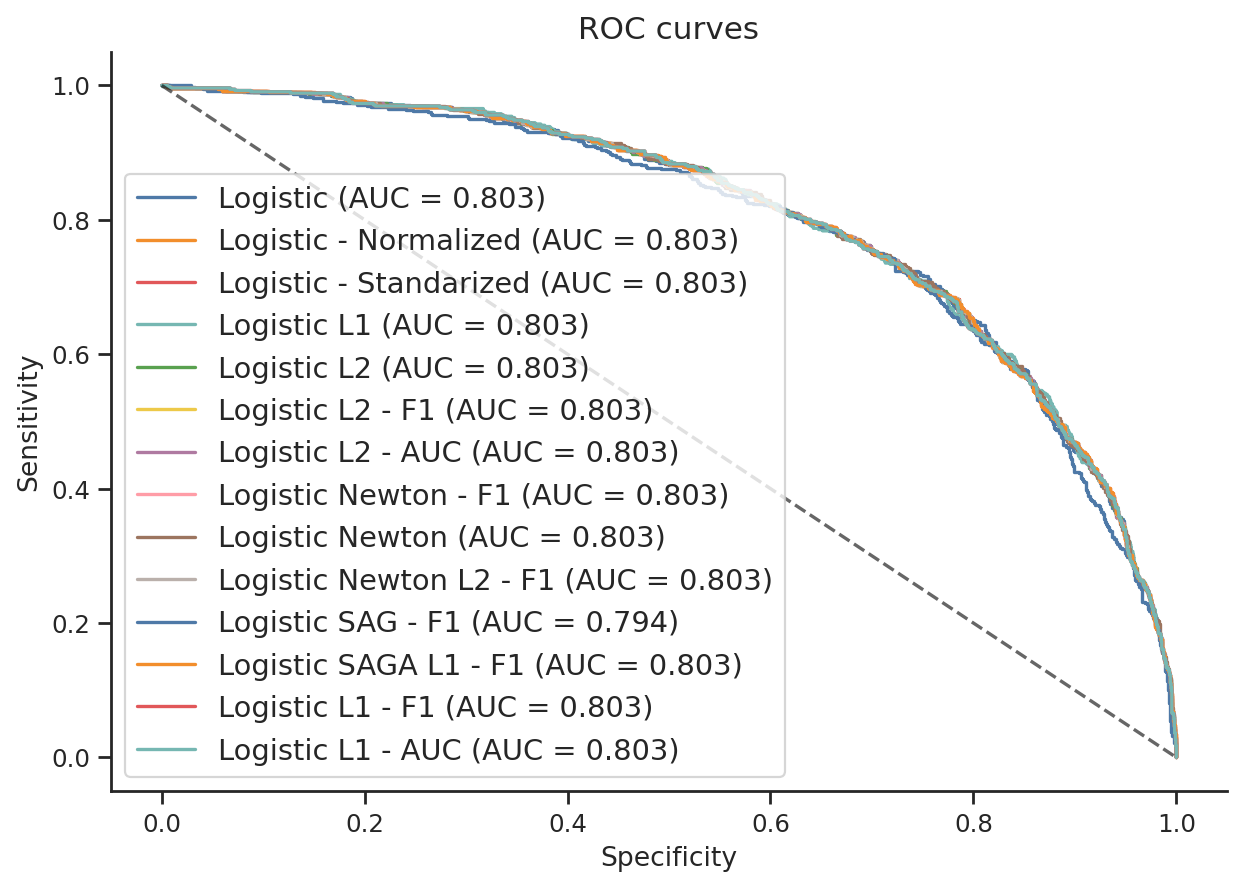

In [ ]:
from tutorial2 import rocplot
fig, ax = rocplot(y_valid, y_prob, labels=pd.Series(rows))
plt.show()

(True Negatives):  2469
(False Positives):  53
(False Negatives):  415
(True Positives):  107
Total Actuall Subscribed:  522
(True Negatives):  5307
(False Positives):  111
(False Negatives):  884
(True Positives):  221
Total Actuall Subscribed:  1105
(True Negatives):  1816
(False Positives):  3602
(False Negatives):  70
(True Positives):  1035
Total Actuall Subscribed:  1105


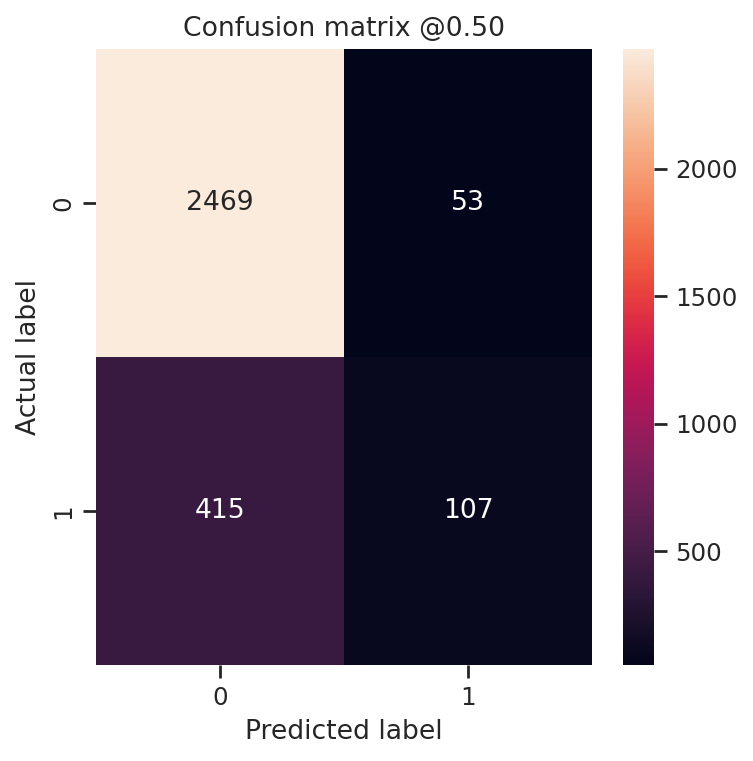

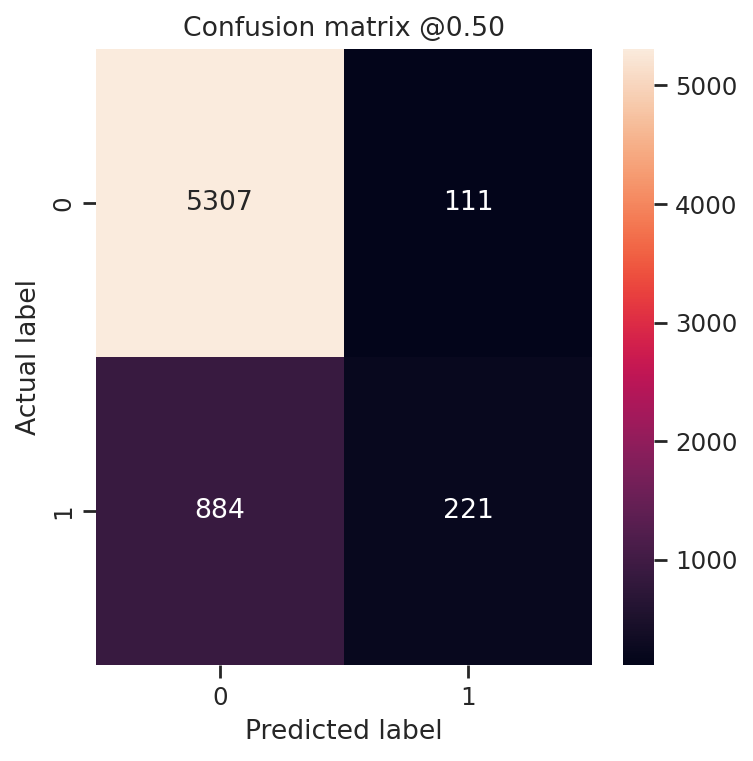

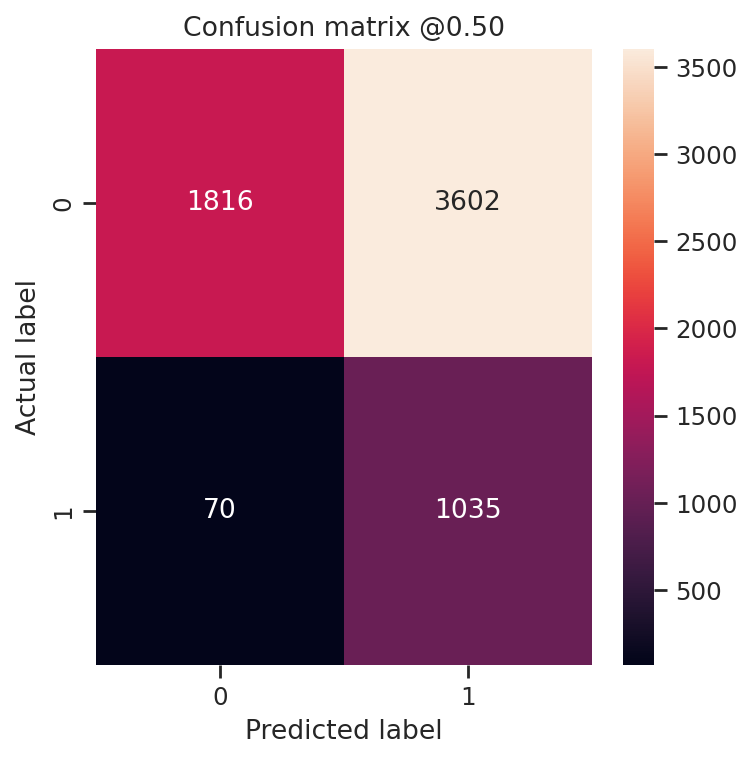

In [ ]:
# logit_n

tau = 1/20

method = logit_n

y_prob = method.predict_proba(logit_X_valid_n)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(logit_X_test_n)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(logit_X_test_n)[:,1]
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)

(True Negatives):  2477
(False Positives):  45
(False Negatives):  416
(True Positives):  106
Total Actuall Subscribed:  522
(True Negatives):  5311
(False Positives):  107
(False Negatives):  885
(True Positives):  220
Total Actuall Subscribed:  1105
(True Negatives):  1764
(False Positives):  3654
(False Negatives):  68
(True Positives):  1037
Total Actuall Subscribed:  1105


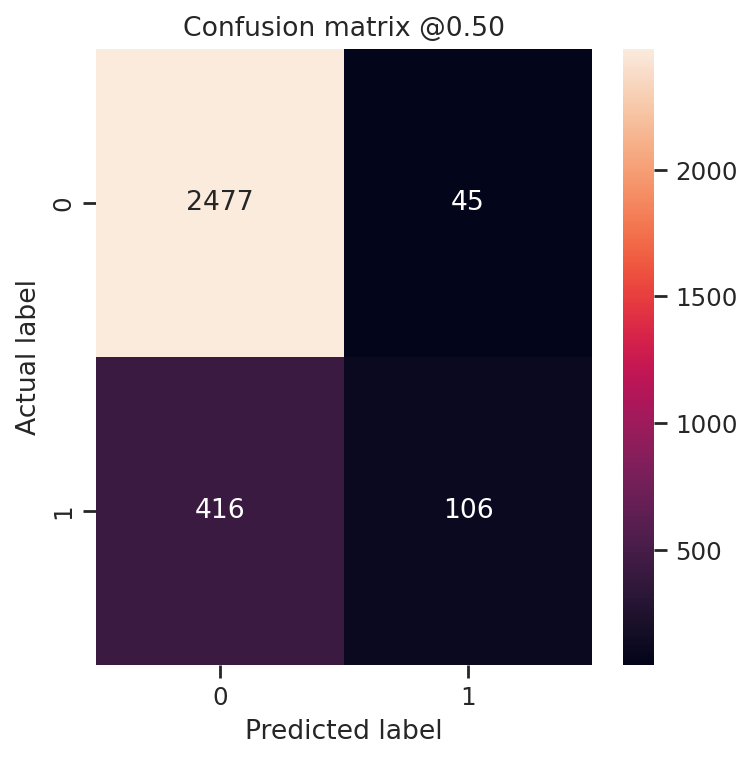

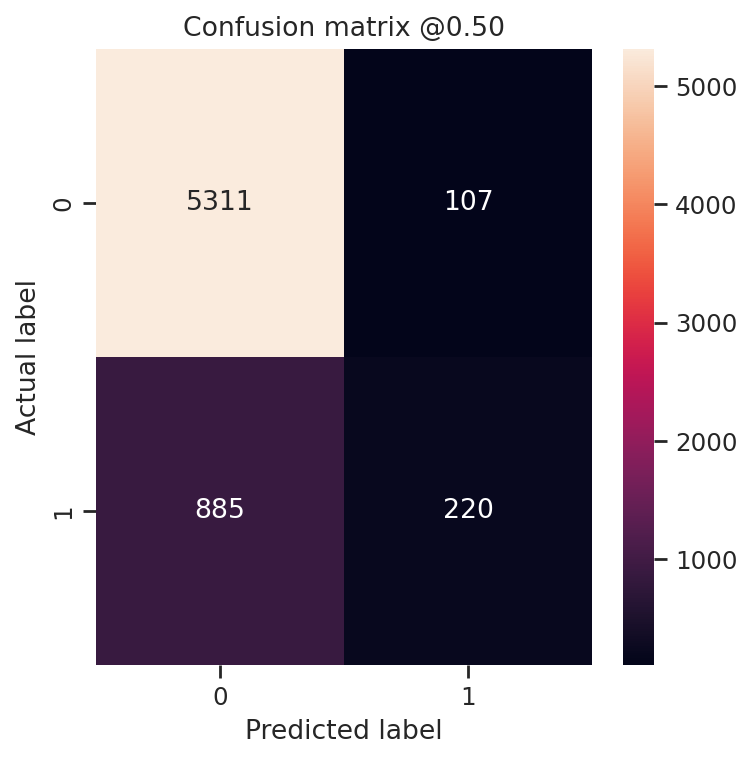

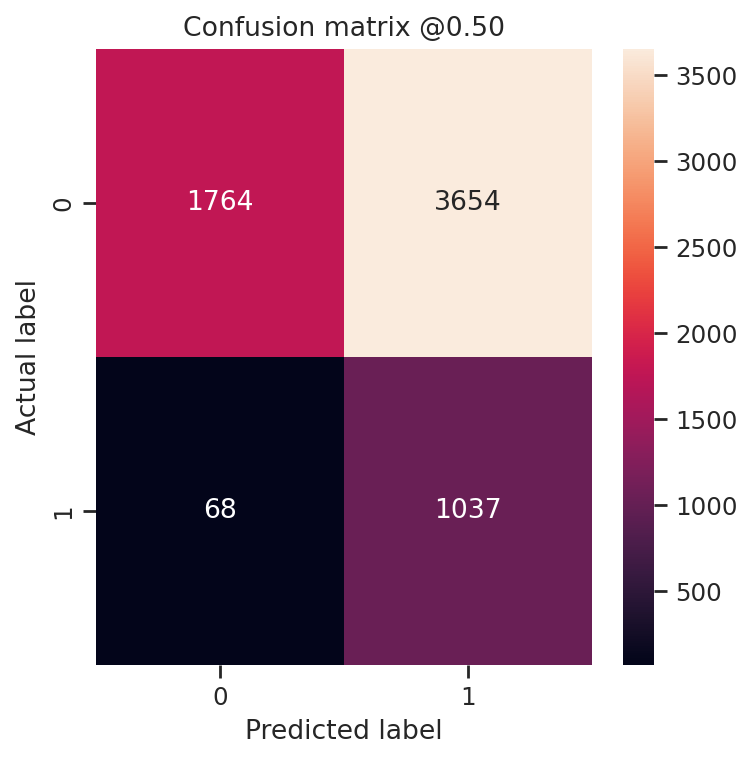

In [ ]:
# logit l1 F1-score

tau = 1/20

method = logit_nt


y_prob = method.predict_proba(logit_X_valid)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(logit_X_test)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(logit_X_test)[:,1]
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)

## Best logistic - Best linear model

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# # AUC
# logit_con = ['avrgYJ', 'ccspend','fredaysLog',
#              'markdownLog',
#              'freLog','avg_sale_per_itemBC']
# logit_cat = ['clustype'] 


# # F1
# # logit_con_f = ['avrgBC', 'ccspend','fredaysBC',
#             #  'markdownLog', 
#             #  'freLog', 'avg_sale_per_itemBC']

# # logit_cat = ['clustypeCatBoost'] 


# logit_predictors = binary + ordinal + logit_cat + logit_con

# logit_X_train = train[logit_predictors]
# logit_X_valid = valid[logit_predictors]
# logit_X_test = test[logit_predictors]


# # Standardization

# scaler = StandardScaler()
# logit_X_train_s = scaler.fit_transform(logit_X_train)
# logit_X_valid_s = scaler.transform(logit_X_valid)
# logit_X_test_s = scaler.transform(logit_X_test)  

(True Negatives):  2475
(False Positives):  47
(False Negatives):  414
(True Positives):  108
Total Actuall Subscribed:  522
(True Negatives):  5318
(False Positives):  100
(False Negatives):  888
(True Positives):  217
Total Actuall Subscribed:  1105
(True Negatives):  1745
(False Positives):  3673
(False Negatives):  60
(True Positives):  1045
Total Actuall Subscribed:  1105


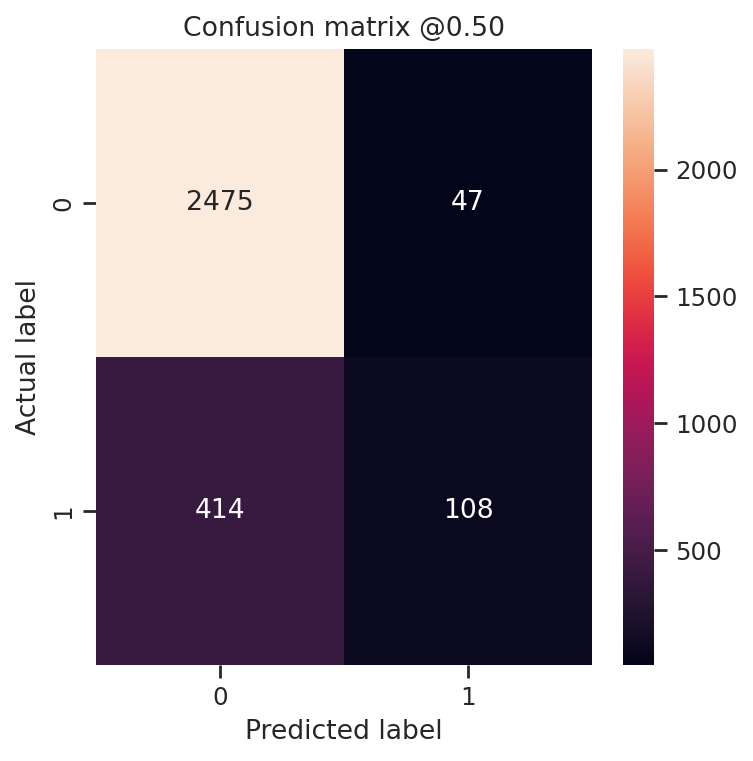

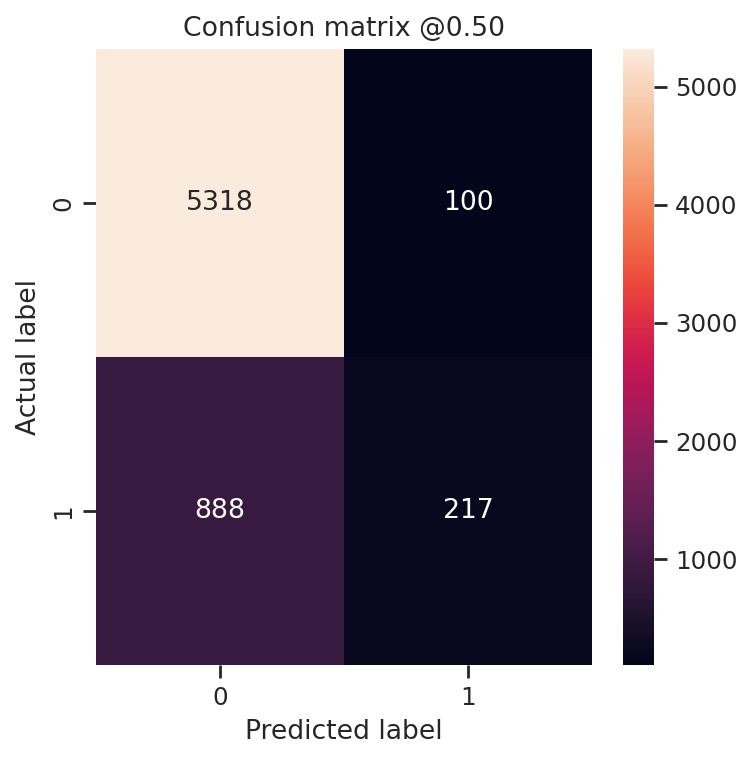

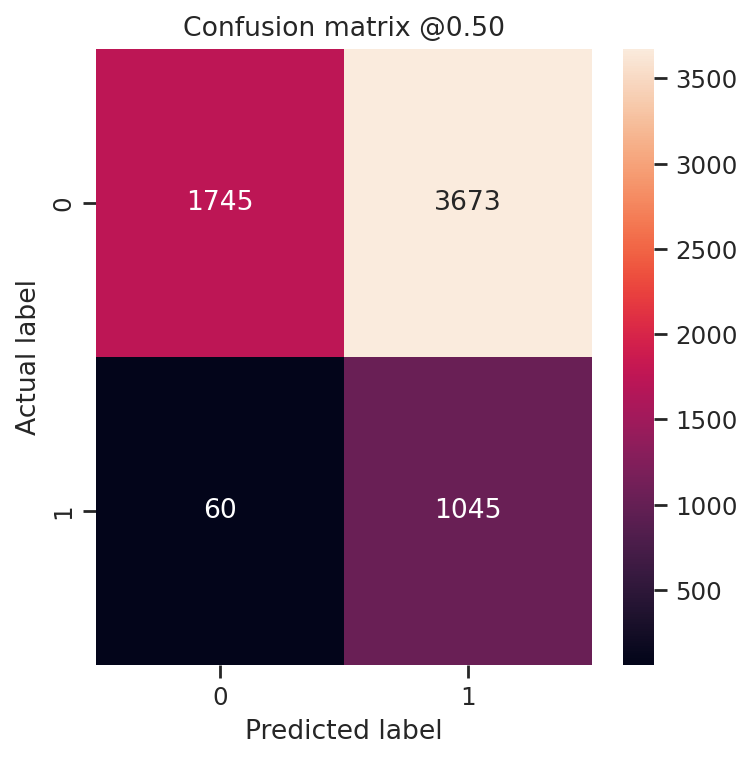

In [ ]:
# logit l1 regularization

tau = 1/20

method = logit_l1



y_prob = method.predict_proba(logit_X_valid_s)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(logit_X_test_s)[:, 1]
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(logit_X_test_s)[:,1]
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)

In [ ]:
print("Coefficients:", logit_l1.coef_)
print("Intercept:", logit_l1.intercept_)
print("Best C (Inverse of regularization strength):", logit_l2_f1.C_)

Coefficients: [[ 1.75502435e-01  1.06266104e-01  6.04986182e-02 -4.24614709e-02
   0.00000000e+00  3.35053792e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.09832439e-02  0.00000000e+00
  -2.18667357e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.45355948e-02  0.00000000e+00 -1.26833408e-02 -2.03412734e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.65444060e-02
   0.00000000e+00  7.56267511e-03  0.00000000e+00  0.00000000e+00
   6.45901766e-03  0.00000000e+00  0.00000000e+00  5.28271056e-02
  -4.19895529e-02 -1.72939287e-04  7.97189327e-01 -3.15864267e-02]]
Intercept: [-2.02890072]
Best C (Inverse of regularization strength): [0.26826958]


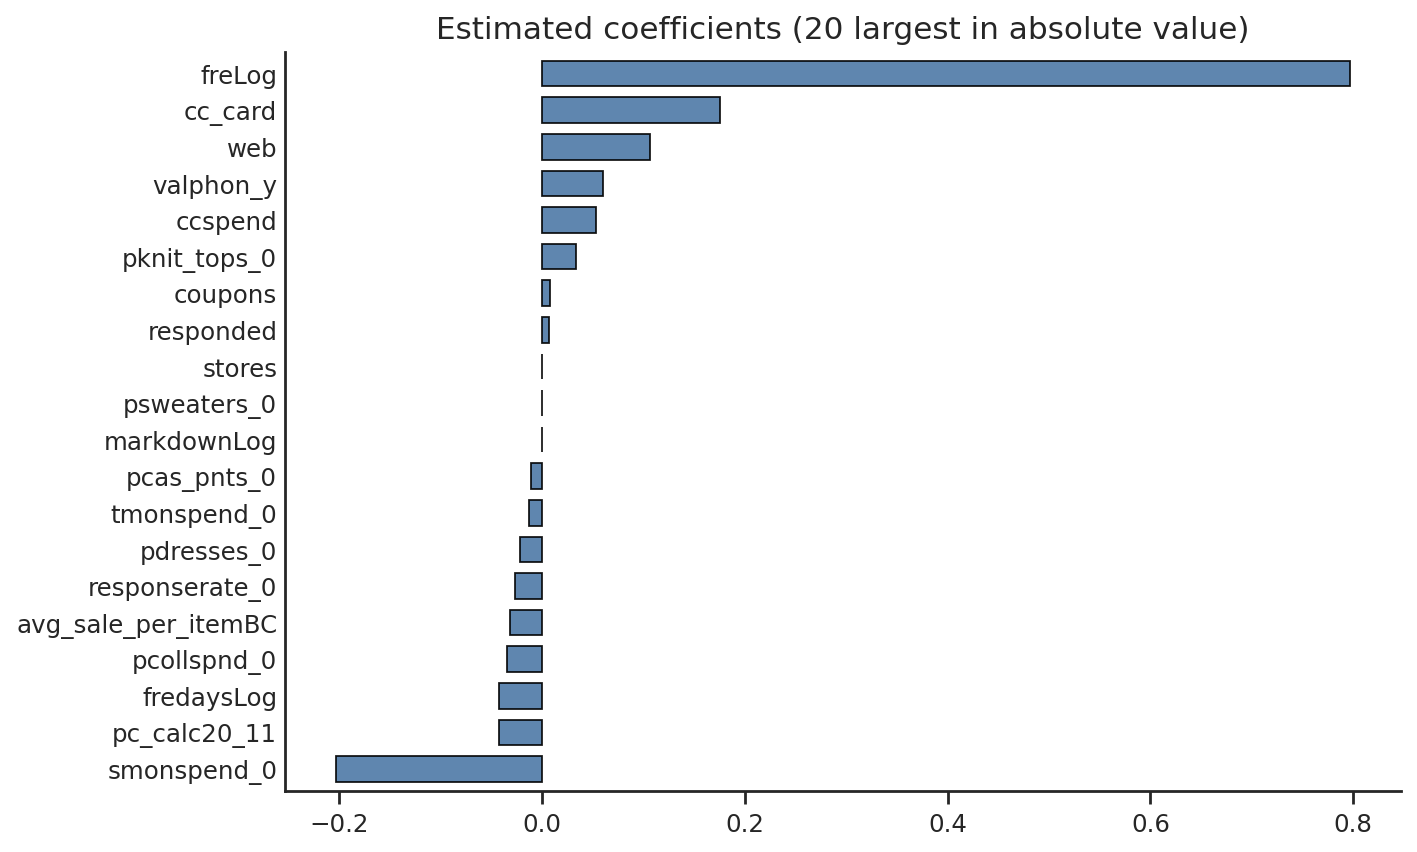

In [ ]:
from tutorial2 import coefplot

coefplot(logit_l1, logit_predictors)
plt.show()

# LogisticGAM

In [ ]:
coef = logit_l1.coef_
table = pd.Series(coef.ravel(), index = logit_predictors).sort_values(ascending=True, inplace=False)
table = table.to_frame()
table

,0
smonspend_0,-0.203413
pc_calc20_11,-0.042461
fredaysLog,-0.041990
pcollspnd_0,-0.034536
avg_sale_per_itemBC,-0.031586
responserate_0,-0.026544
pdresses_0,-0.021867
tmonspend_0,-0.012683
pcas_pnts_0,-0.010983
markdownLog,-0.000173


In [ ]:
# print(logit_l1.coef_.shape)
# print(logit_X_train.shape)

gam_feature = ['freLog','web', 'smonspend_0', 'cc_card']


gamX_train = train[gam_feature]
gamX_valid = valid[gam_feature]
gamX_test = test[gam_feature]
gamX_train.head()

,freLog,web,smonspend_0,cc_card
19843,2.564949,0,0,1
812,0.693147,0,0,1
2533,0.000000,0,0,0
10857,1.791759,0,0,0
9135,1.945910,0,0,0


In [ ]:
from pygam import LogisticGAM, s, f, l, te



gam = LogisticGAM(l(0) + f(1) + f(2) + f(3))

gam.fit(gamX_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=l(0) + f(1) + f(2) + f(3) + intercept, tol=0.0001, 
   verbose=False)

## GAM1

In [ ]:
from pygam import LogisticGAM, s, f, l, te
from optuna.samplers import TPESampler

def objective(trial):

    # We use factor function for categorical variables (even if we code them into numerical)
    # We find the same lambda for all models
    lambdas = []
    for j in range(len(gam_feature)):
        lambdas.append(trial.suggest_loguniform(f'lambda_{j}', 1e-4, 10000.0))
                               
    model = LogisticGAM(l(0) + f(1) + f(2) + f(3), lam=lambdas)
    
    model.fit(gamX_train, y_train)
    
    return model.statistics_['loglikelihood']

sampler = TPESampler(seed=7)  # makes the sampler behave in a deterministic way
study = optuna.create_study(direction='maximize', sampler=sampler) # TPE is a method for Bayesian optimisation
study.optimize(objective, n_trials=10000, timeout=120)

[I 2023-05-22 01:32:26,434] A new study created in memory with name: no-name-f0216343-58b2-434f-bc90-46bf103b15ae
[I 2023-05-22 01:32:26,825] Trial 0 finished with value: -4407.48122301858 and parameters: {'lambda_0': 0.00040781792912640975, 'lambda_1': 173.52031920235248, 'lambda_2': 0.3215687604171317, 'lambda_3': 61.33684349587851}. Best is trial 0 with value: -4407.48122301858.
[I 2023-05-22 01:32:27,232] Trial 1 finished with value: -4723.479931898795 and parameters: {'lambda_0': 6666.779571482655, 'lambda_1': 2.0322024157213083, 'lambda_2': 1.0208541750449804, 'lambda_3': 0.00037705878770494}. Best is trial 0 with value: -4407.48122301858.
[I 2023-05-22 01:32:27,590] Trial 2 finished with value: -4406.404917400991 and parameters: {'lambda_0': 0.01404467975150636, 'lambda_1': 0.9978379258766116, 'lambda_2': 27.154384859236178, 'lambda_3': 269.0991269930257}. Best is trial 2 with value: -4406.404917400991.
[I 2023-05-22 01:32:27,911] Trial 3 finished with value: -4420.10624168144 a

In [ ]:
lambdas1 = list(study.best_params.values())
print(lambdas1)

gam1 = LogisticGAM(l(0) + f(1) + f(2) + f(3), lam=lambdas1)
gam1.fit(gamX_train, y_train)
gam1.summary()

[0.00010107445008734649, 0.00010109049720204718, 0.00017657997044399467, 0.00025587265543282014]
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         5.0
Link Function:                        LogitLink Log Likelihood:                                 -4403.2893
Number of Samples:                        12173 AIC:                                             8816.5785
                                                AICc:                                            8816.5854
                                                UBRE:                                               2.7246
                                                Scale:                                                 1.0
                                               

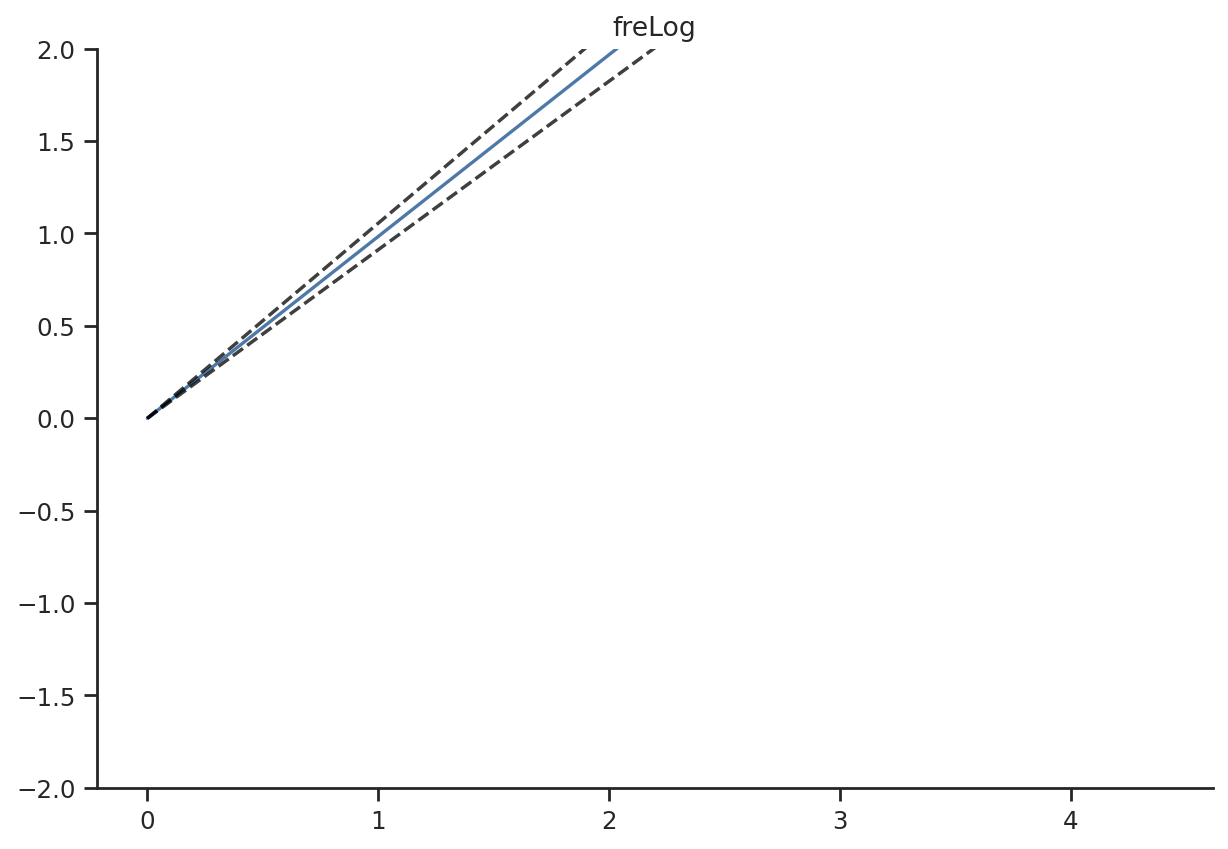

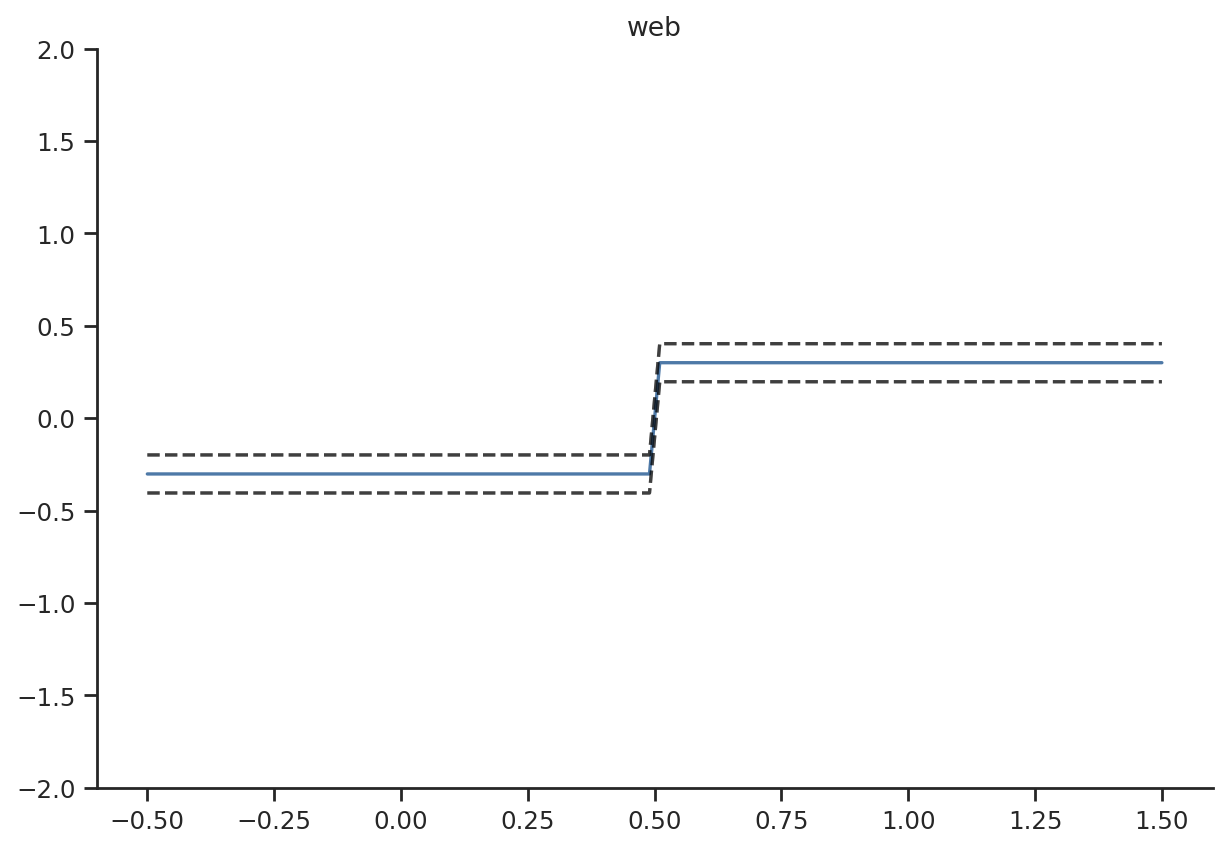

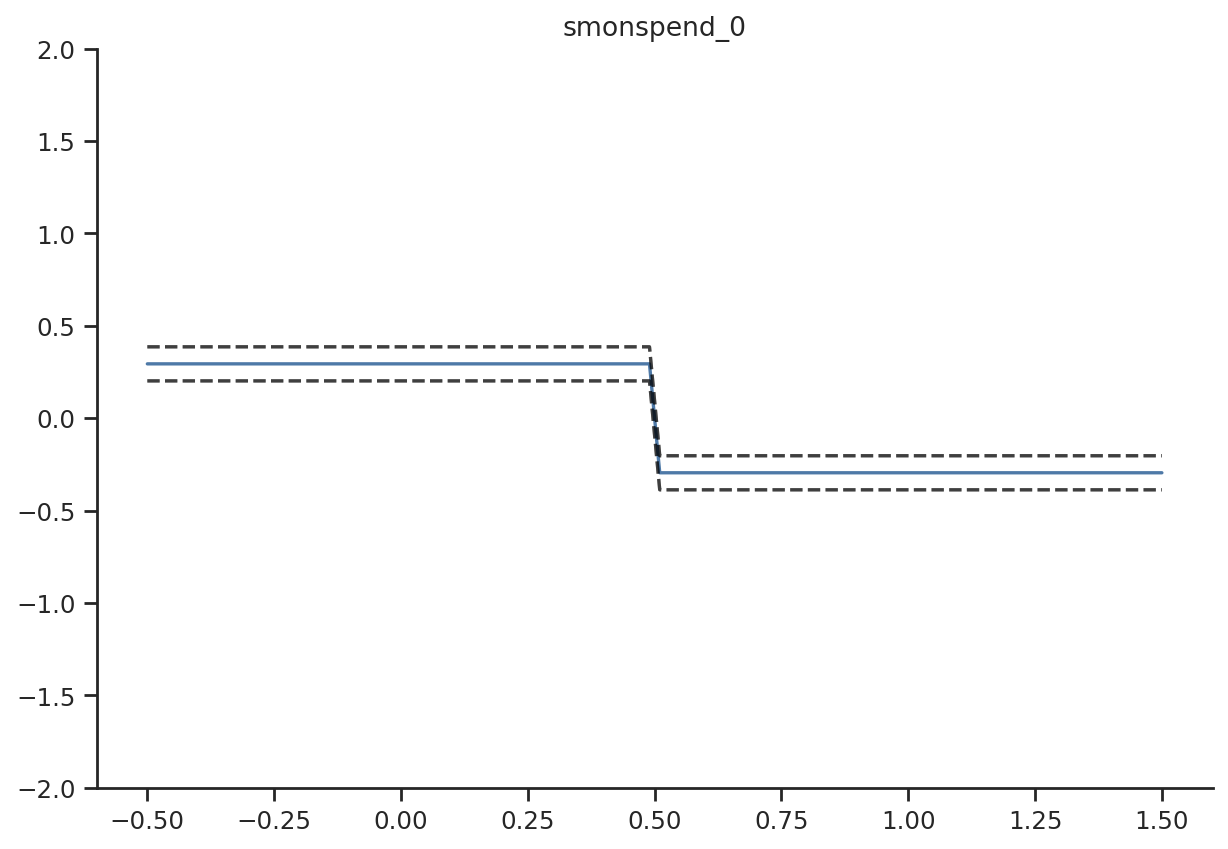

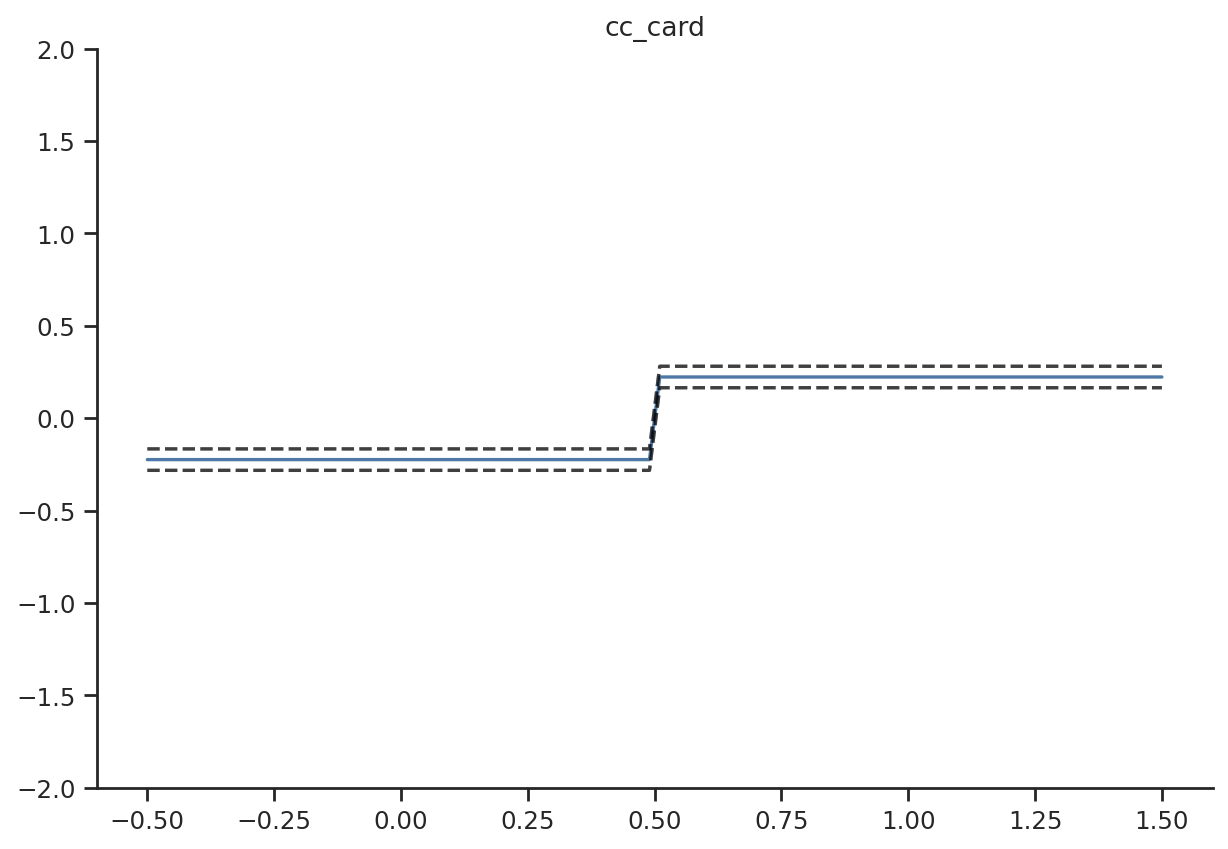

In [ ]:
for j, term in enumerate(gam1.terms):
    
    if term.isintercept:
        continue

    XX = gam1.generate_X_grid(term=j)
    pdep, confi = gam1.partial_dependence(term=j, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    
    plt.plot(XX[:, term.feature], confi, c='black', ls='--', alpha=0.5)
    
    plt.plot(XX[:, term.feature], confi, c='black', ls='--', alpha=0.5)
    
    plt.ylim(-2, 2)
        
    plt.title(gam_feature[j])
    sns.despine()
    plt.show()

## GAM2

In [ ]:
from pygam import LogisticGAM, s, f, l, te
from optuna.samplers import TPESampler

def objective(trial):

    # We use factor function for categorical variables (even if we code them into numerical)
    # We find the same lambda for all models
    lambdas = []
    for j in range(len(gam_feature)):
        lambdas.append(trial.suggest_loguniform(f'lambda_{j}', 1e-4, 10000.0))
                               
    model = LogisticGAM(s(0) + f(1) + f(2) + f(3), lam=lambdas)
    
    model.fit(gamX_train, y_train)
    
    return model.statistics_['loglikelihood']

sampler = TPESampler(seed=7)  # makes the sampler behave in a deterministic way
study = optuna.create_study(direction='maximize', sampler=sampler) # TPE is a method for Bayesian optimisation
study.optimize(objective, n_trials=10000, timeout=120)

[I 2023-05-22 01:35:37,775] A new study created in memory with name: no-name-752c64a2-6fe6-437c-88a2-782c39b0683f
[I 2023-05-22 01:35:38,591] Trial 0 finished with value: -4396.9412401180925 and parameters: {'lambda_0': 0.00040781792912640975, 'lambda_1': 173.52031920235248, 'lambda_2': 0.3215687604171317, 'lambda_3': 61.33684349587851}. Best is trial 0 with value: -4396.9412401180925.
[I 2023-05-22 01:35:39,297] Trial 1 finished with value: -4398.589365411289 and parameters: {'lambda_0': 6666.779571482655, 'lambda_1': 2.0322024157213083, 'lambda_2': 1.0208541750449804, 'lambda_3': 0.00037705878770494}. Best is trial 0 with value: -4396.9412401180925.
[I 2023-05-22 01:35:40,217] Trial 2 finished with value: -4396.383229610128 and parameters: {'lambda_0': 0.01404467975150636, 'lambda_1': 0.9978379258766116, 'lambda_2': 27.154384859236178, 'lambda_3': 269.0991269930257}. Best is trial 2 with value: -4396.383229610128.
[I 2023-05-22 01:35:41,208] Trial 3 finished with value: -4410.0870743

In [ ]:
lambdas2 = list(study.best_params.values())
print(lambdas2)

gam2 = LogisticGAM(s(0) + f(1) + f(2) + f(3), lam=lambdas2)
gam2.fit(gamX_train, y_train)
gam2.summary()

[0.00010012282696480714, 0.0009096524649363792, 0.021822386148017982, 0.16759243664888085]
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.8177
Link Function:                        LogitLink Log Likelihood:                                  -4393.063
Number of Samples:                        12173 AIC:                                             8825.7613
                                                AICc:                                            8825.8361
                                                UBRE:                                               2.7263
                                                Scale:                                                 1.0
                                                Pseud

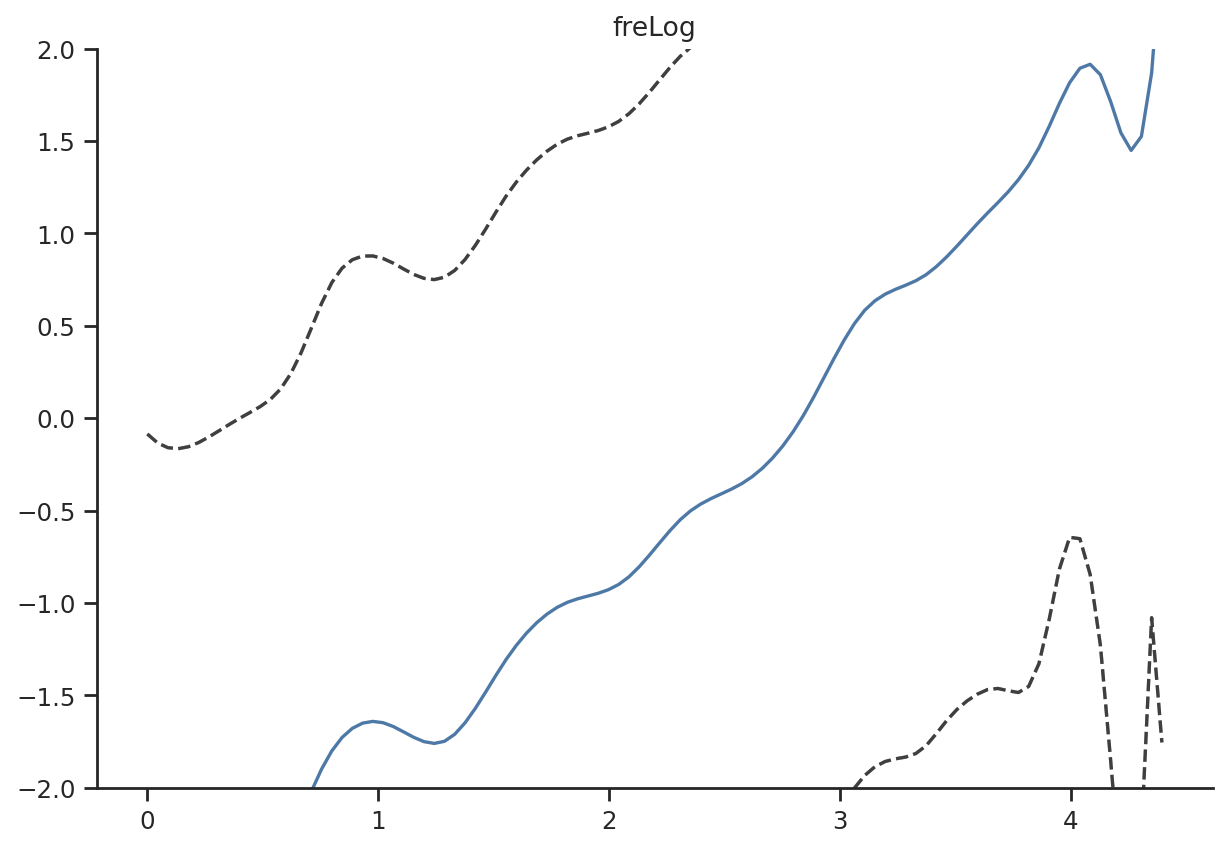

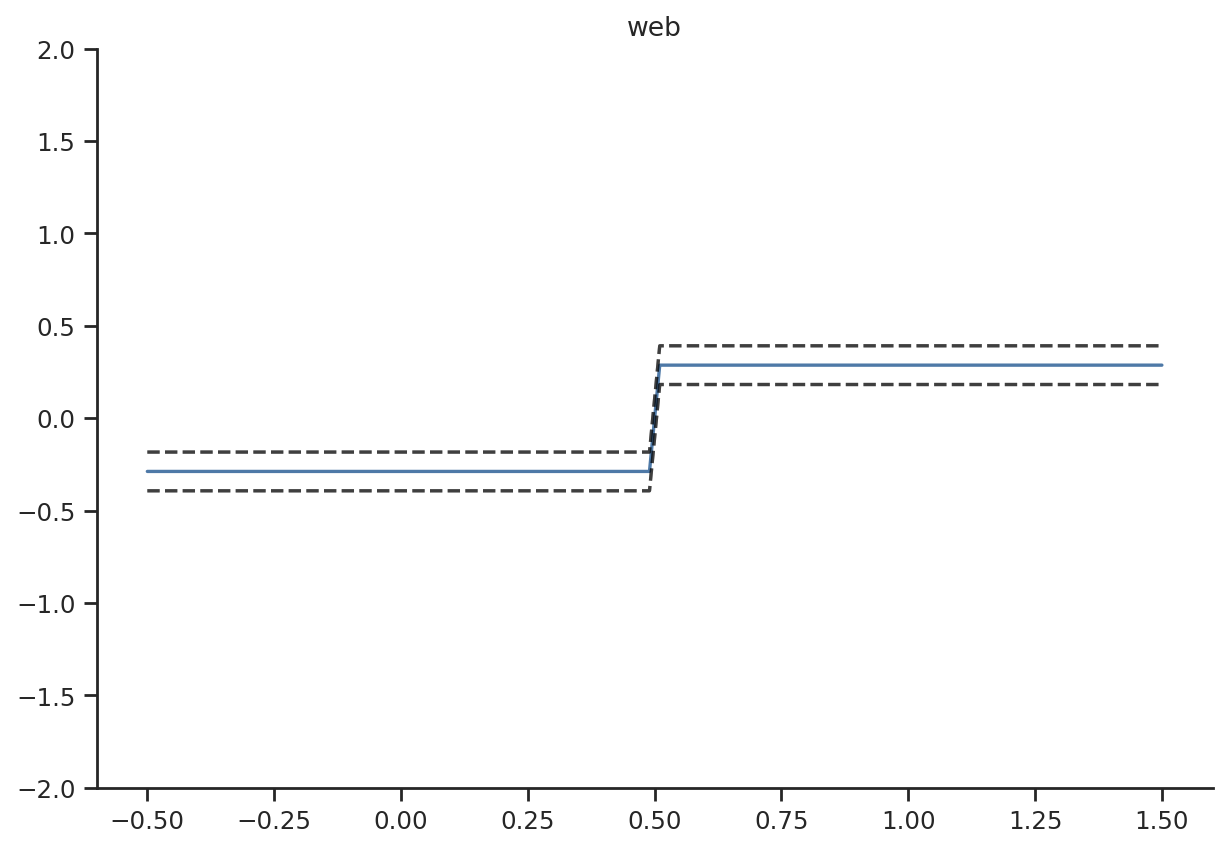

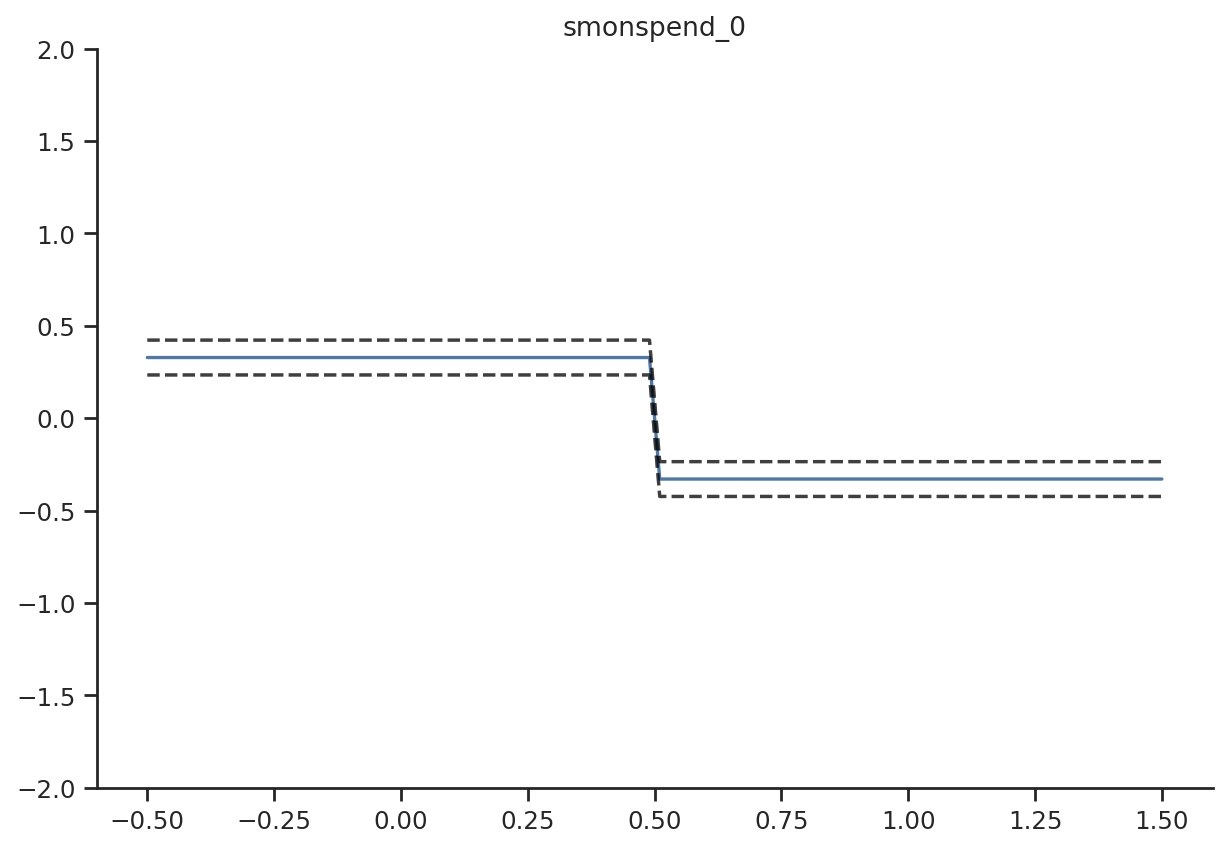

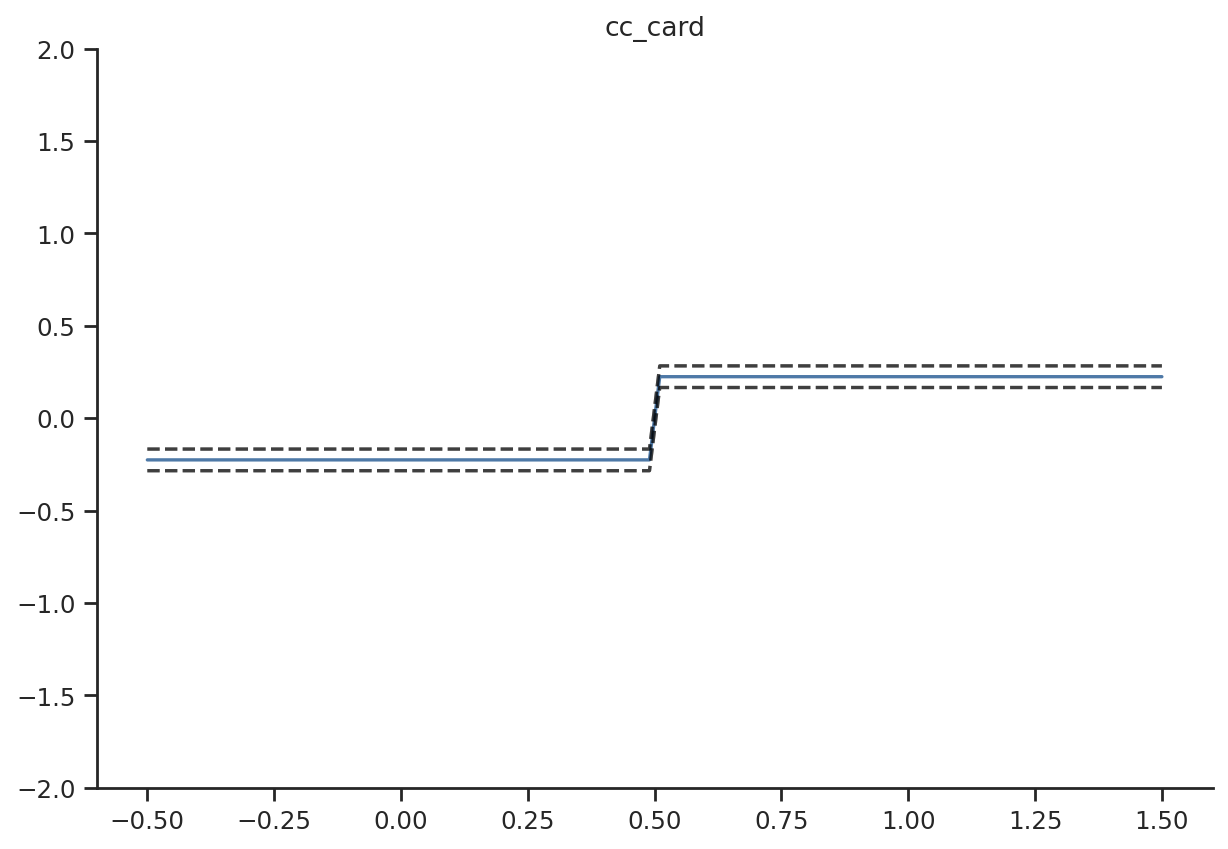

In [ ]:
for j, term in enumerate(gam2.terms):
    
    if term.isintercept:
        continue

    XX = gam2.generate_X_grid(term=j)
    pdep, confi = gam2.partial_dependence(term=j, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    
    plt.plot(XX[:, term.feature], confi, c='black', ls='--', alpha=0.5)
    
    plt.plot(XX[:, term.feature], confi, c='black', ls='--', alpha=0.5)
    
    plt.ylim(-2, 2)
        
    plt.title(gam_feature[j])
    sns.despine()
    plt.show()

## Validation results

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, log_loss,f1_score

columns=['Loss', 'SE', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross-entropy',
         'F1-score', 'Error Rate']

rows=['LogisticGAM 1','LogisticGAM 2']

results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[gam1,gam2]

y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):    

    y_prob[:,i] = method.predict_proba(gamX_valid)

    tau = 1/20       
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  19*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 


    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*9)/len(y_test)
    results.iloc[i,1] =  np.std(loss)/np.sqrt(len(y_valid))
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  precision_score(y_valid, y_pred)
    results.iloc[i,5] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,6] =  log_loss(y_valid, y_prob[:,i])
    results.iloc[i,7] =  f1_score(y_valid, y_pred)  #f1-score
    results.iloc[i,8] =   1 - accuracy_score(y_valid, y_pred) # error rate


results.sort_values(by=['AUC','F1-score'], ascending = [0,0]).round(5)

,Loss,SE,Sensitivity,Specificity,Precision,AUC,Cross-entropy,F1-score,Error Rate
LogisticGAM 1,0.70565,0.03319,0.94636,0.35924,0.23412,0.80217,0.36635,0.37538,0.54008
LogisticGAM 2,0.70565,0.03319,0.94636,0.35924,0.23412,0.80203,0.36517,0.37538,0.54008


(True Negatives):  2469
(False Positives):  53
(False Negatives):  420
(True Positives):  102
Total Actuall Subscribed:  522
(True Negatives):  5306
(False Positives):  112
(False Negatives):  874
(True Positives):  231
Total Actuall Subscribed:  1105
(True Negatives):  1854
(False Positives):  3564
(False Negatives):  68
(True Positives):  1037
Total Actuall Subscribed:  1105


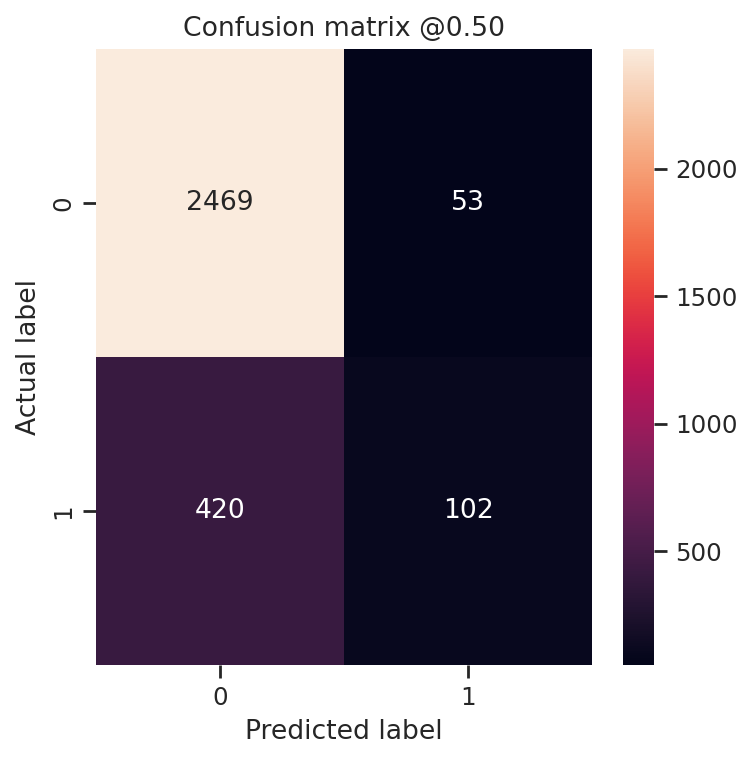

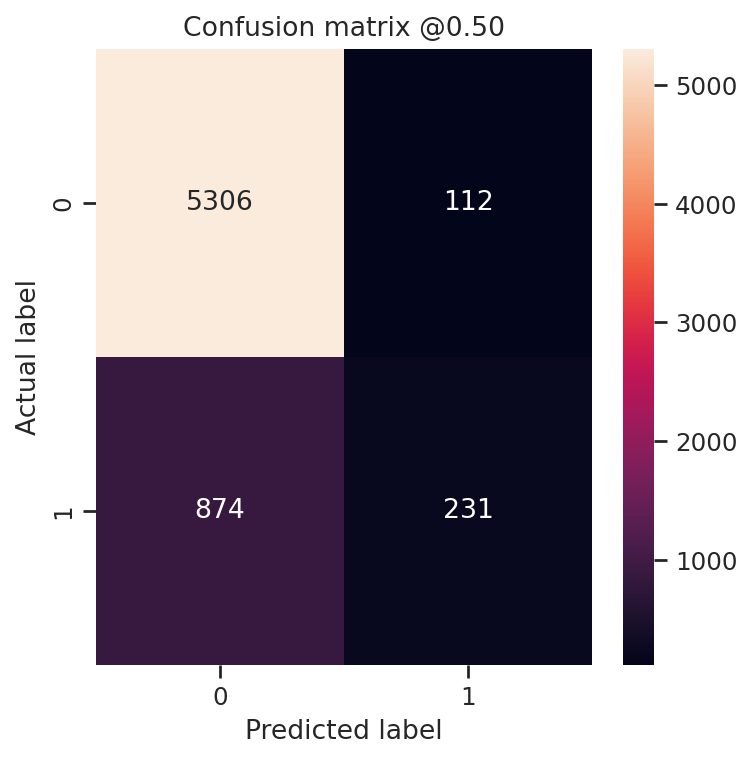

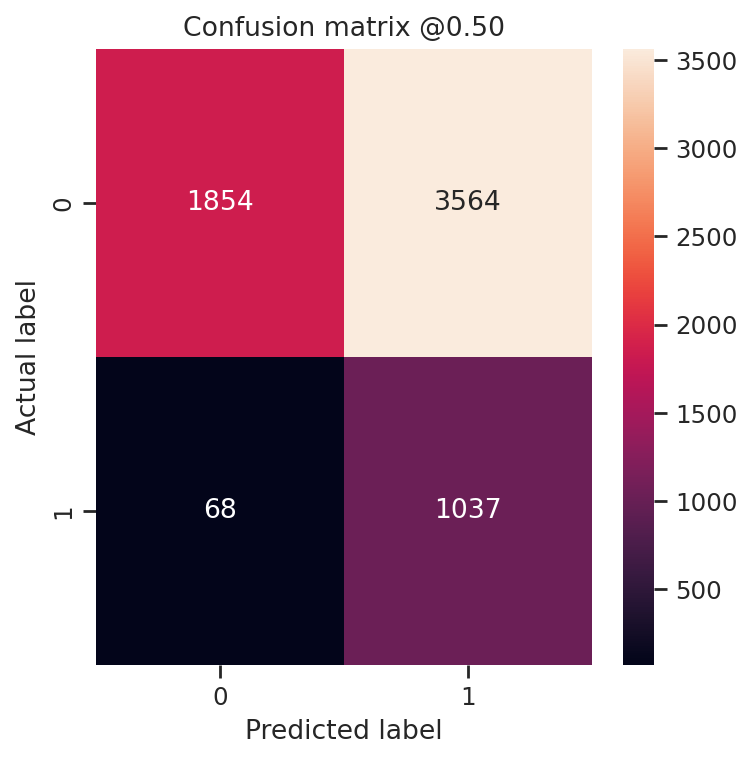

In [ ]:
# GAM 1

tau = 1/20

method = gam1


y_prob = method.predict_proba(gamX_valid)
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]


plot_cm(y_valid, y_pred)

# Gradient Boosting - test - no threshhold
y_prob = method.predict_proba(gamX_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_prob]

plot_cm(y_test, y_pred)



y_prob = method.predict_proba(gamX_test)
y_pred = [1 if x >= tau else 0 for x in y_prob]

plot_cm(y_test,y_pred)